In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

#from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data for analysis
file_path = Path("Data\data_2019.csv")
cct = pd.read_csv(file_path)
cct.tail()

User  Card  Year  Month  Day  Hour  Minutes  Amount          Use Chip  \
272113  1996     3  2019     12   30    12        0    6.86  Chip Transaction   
272114  1996     3  2019     12   30    18       30   17.94  Chip Transaction   
272115  1996     3  2019     12   31    12       17   16.53  Chip Transaction   
272116  1996     3  2019     12   31    12       26   57.00  Chip Transaction   
272117  1996     3  2019     12   31    12       26  -57.00  Chip Transaction   

        Merchant Name Merchant City Merchant State   MCC isFraud  
272113           3379  Independence             KY  5814      No  
272114           2331  Independence             KY  5541      No  
272115           4512  Independence             KY  5499      No  
272116           4512  Independence             KY  5499      No  
272117           4512  Independence             KY  5499      No

## Statistical Analysis

In [3]:
#creating dataframe of statistics for month, day and hour
temp= cct.groupby(['Hour','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
temp.head()

Hour isFraud    min      max  count        sum       mean  median  \
0     0      No -491.0  1147.13   3404  148053.65  43.494022  29.410   
1     1      No -496.0   996.37   2463  117575.07  47.736529  30.880   
2     2      No -482.0  1406.46   2022  108799.54  53.807883  37.865   
3     3      No -497.0  1208.88   1961  121843.95  62.133580  43.630   
4     4      No -494.0  1344.32   2773  115619.18  41.694620  32.860   

            var  
0   6312.943361  
1   7004.723635  
2  10002.959661  
3  10129.119054  
4   7271.058121

## Hourly breakdown of features


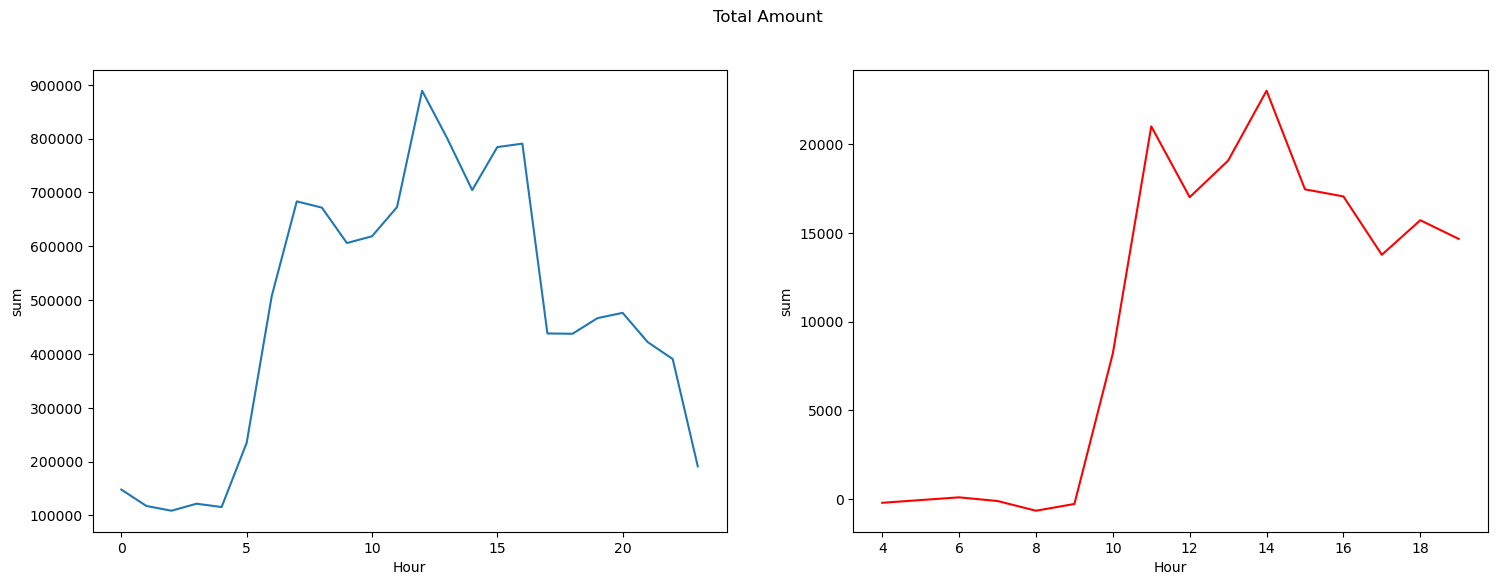

In [4]:
fig_amount_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="sum", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="sum", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show()

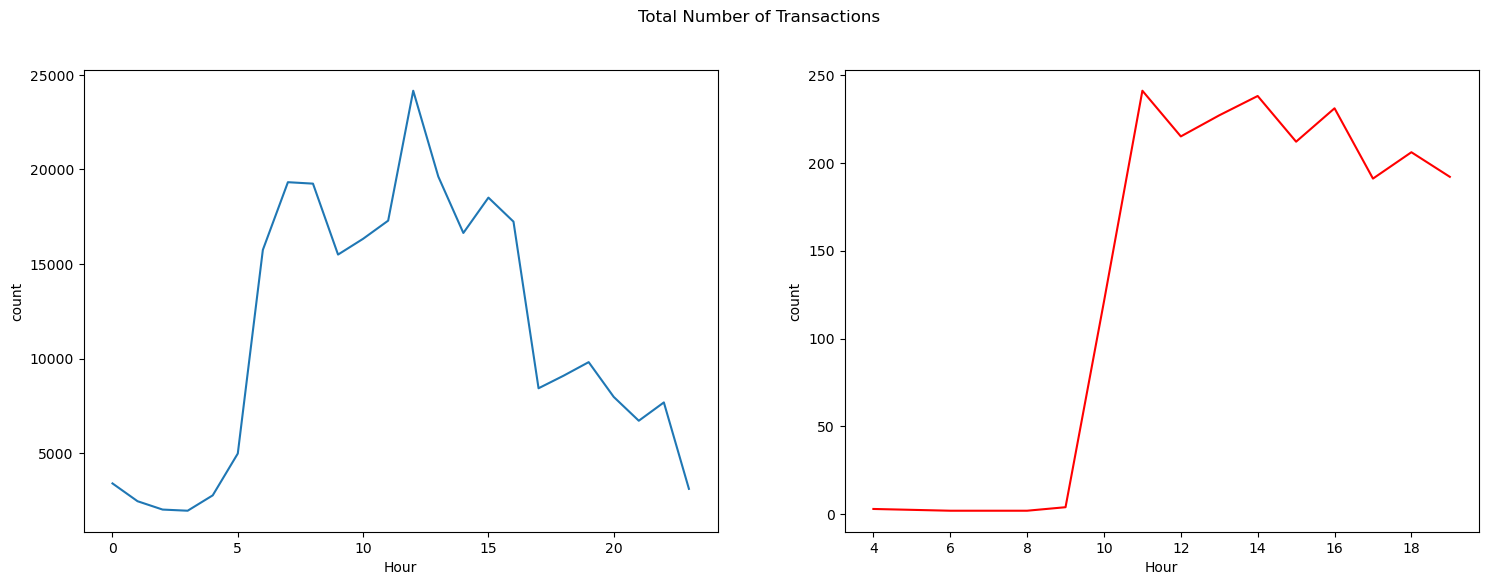

In [5]:
fig_number_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="count", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="count", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

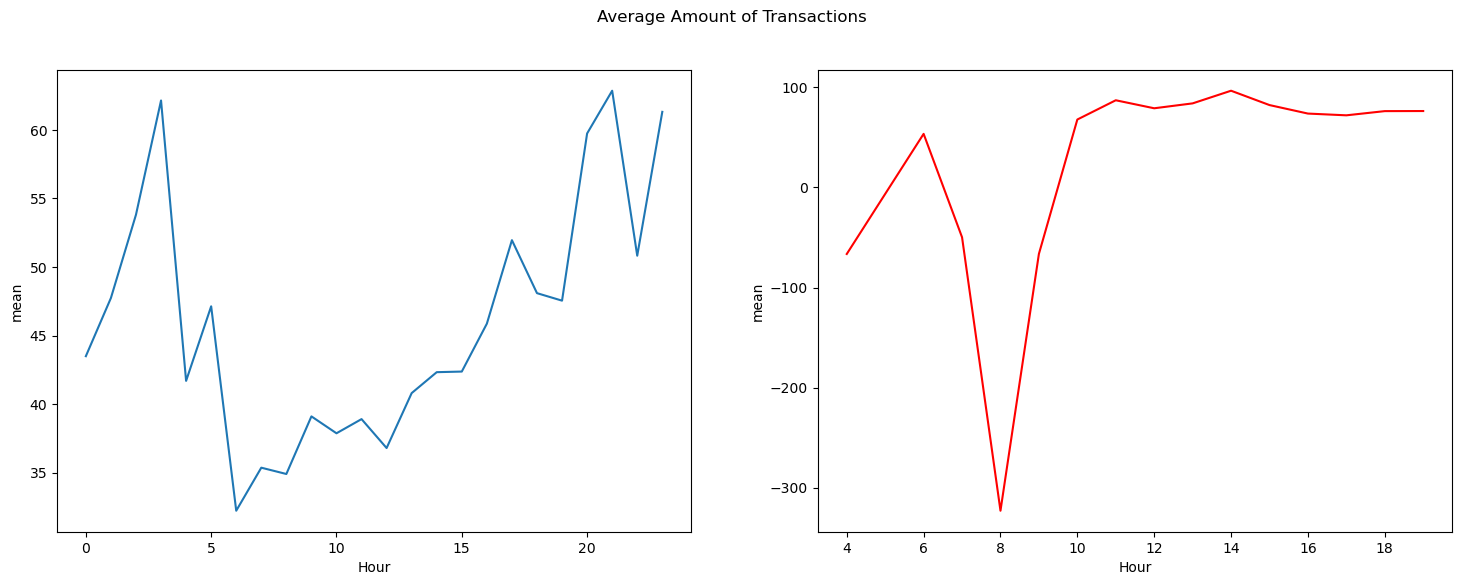

In [6]:
fig_mean_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="mean", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="mean", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

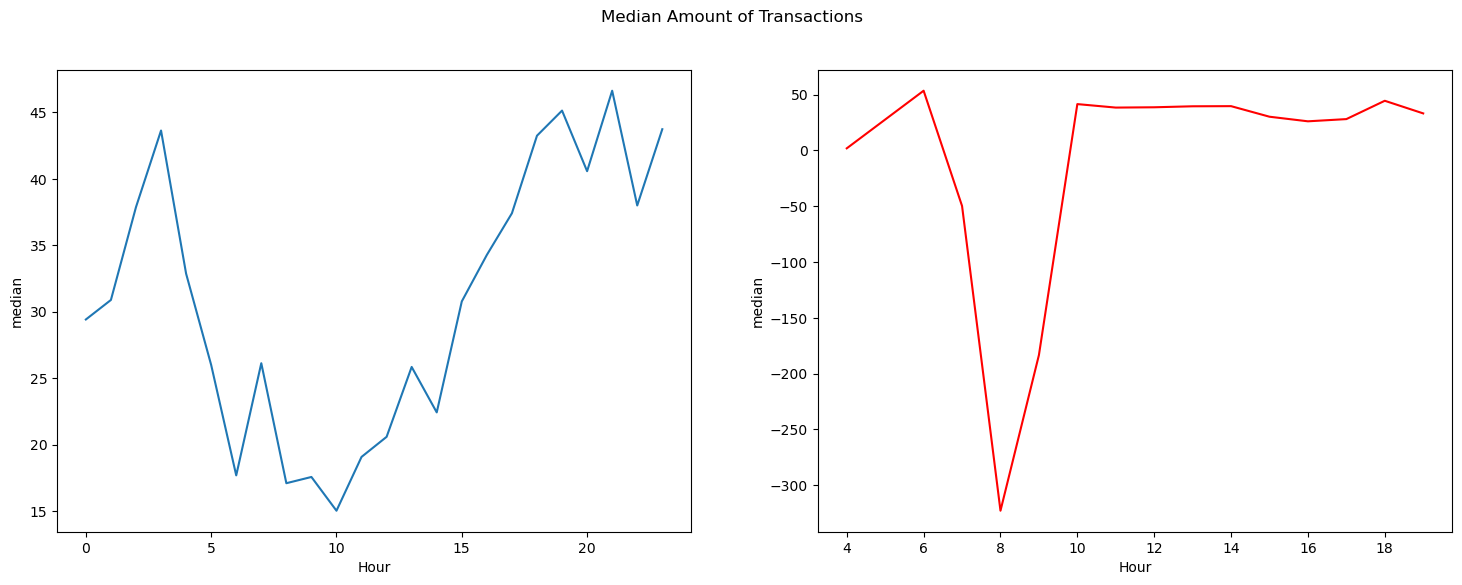

In [7]:
fig_median_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="median", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="median", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

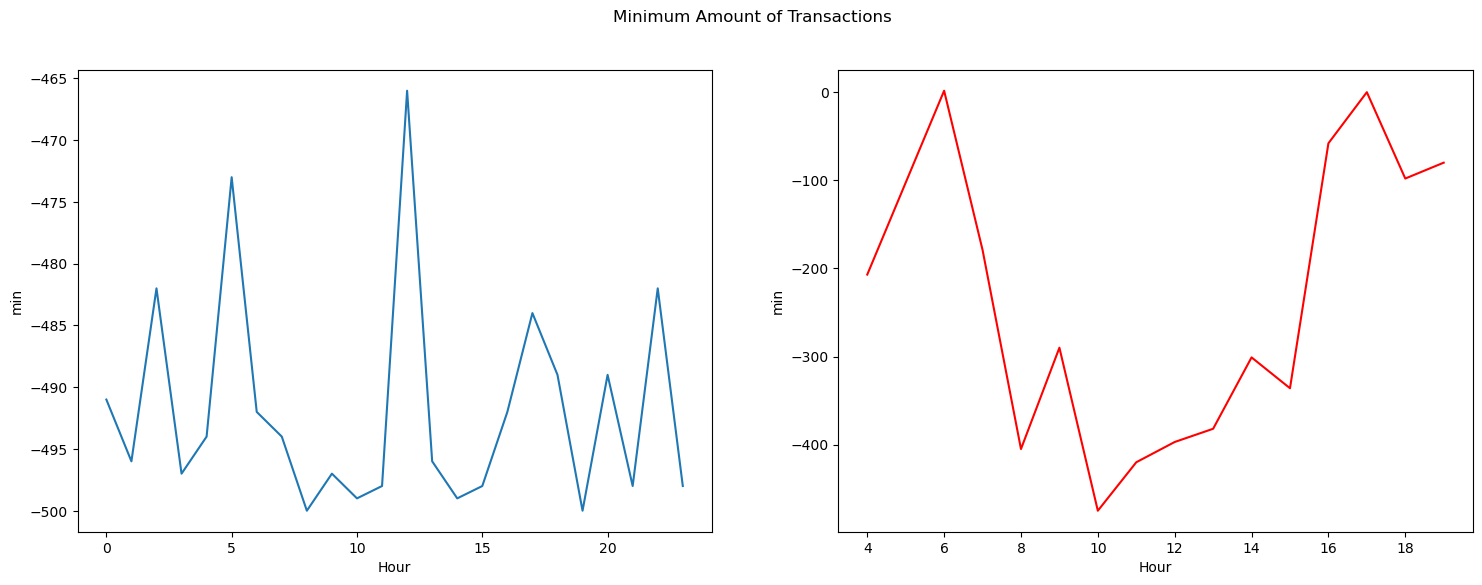

In [8]:
fig_min_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="min", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="min", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

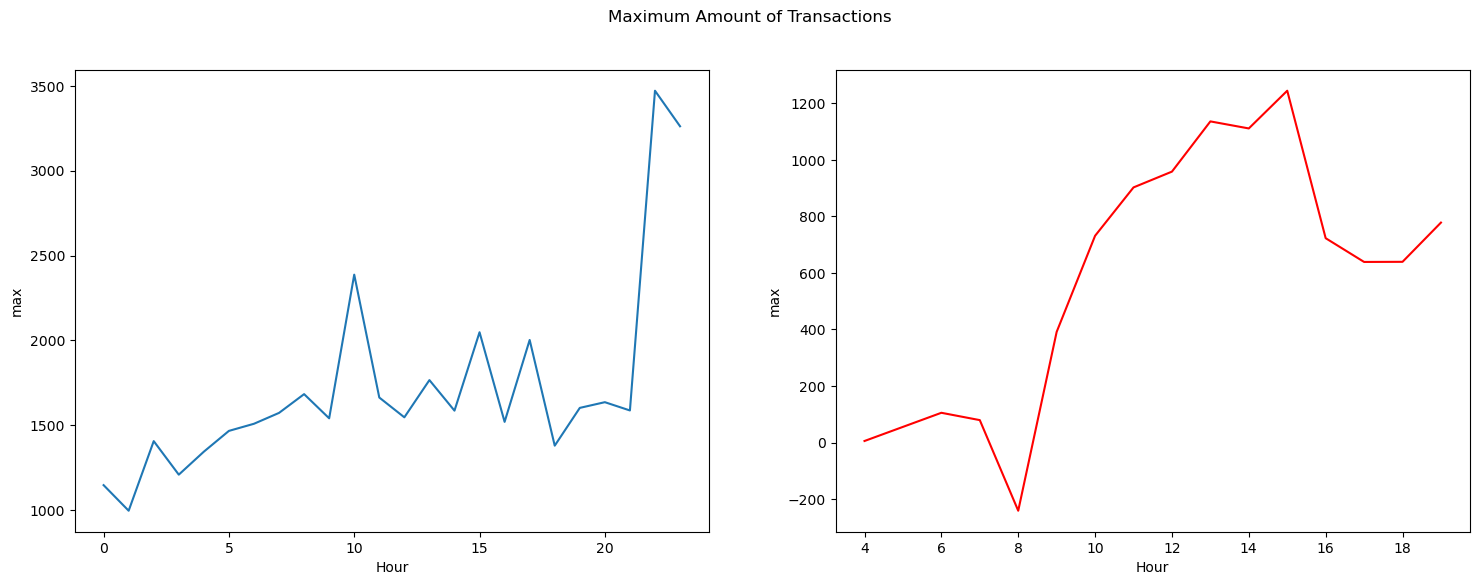

In [9]:
fig_max_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="max", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="max", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

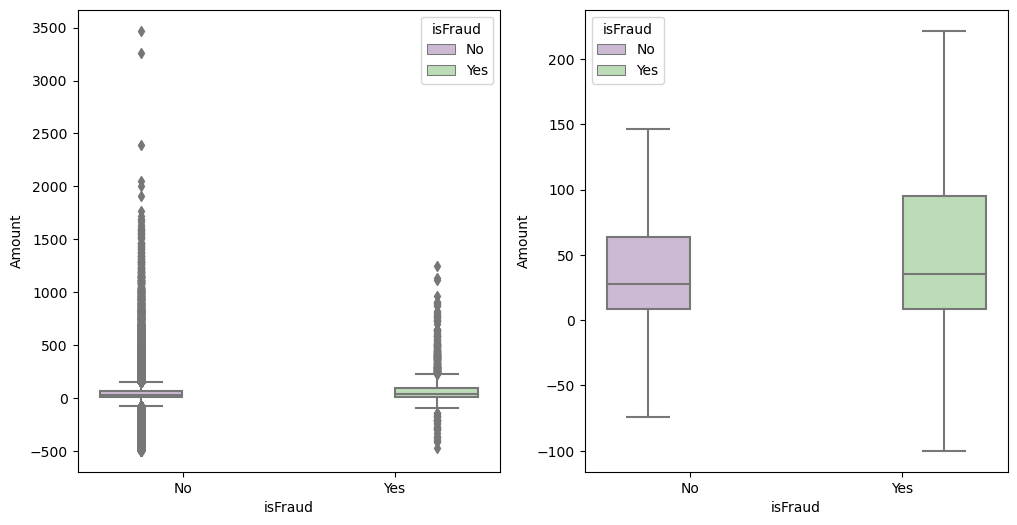

In [10]:
fig_box, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=False)
plt.show()

## Analytical of Day features

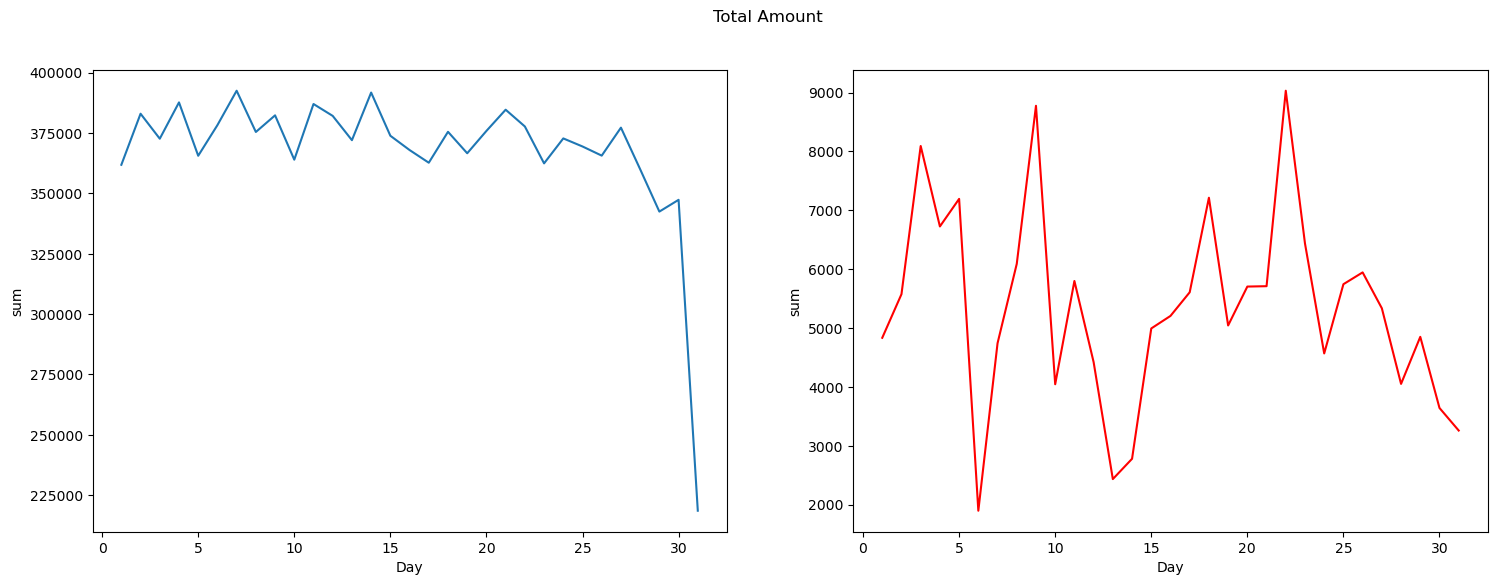

In [11]:
#creating the dataframe for the statistical plots
daily= cct.groupby(['Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
#plotting the fraud and non-fradulent transactions against the total amount in the data set
fig_amount_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="sum", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="sum", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show()

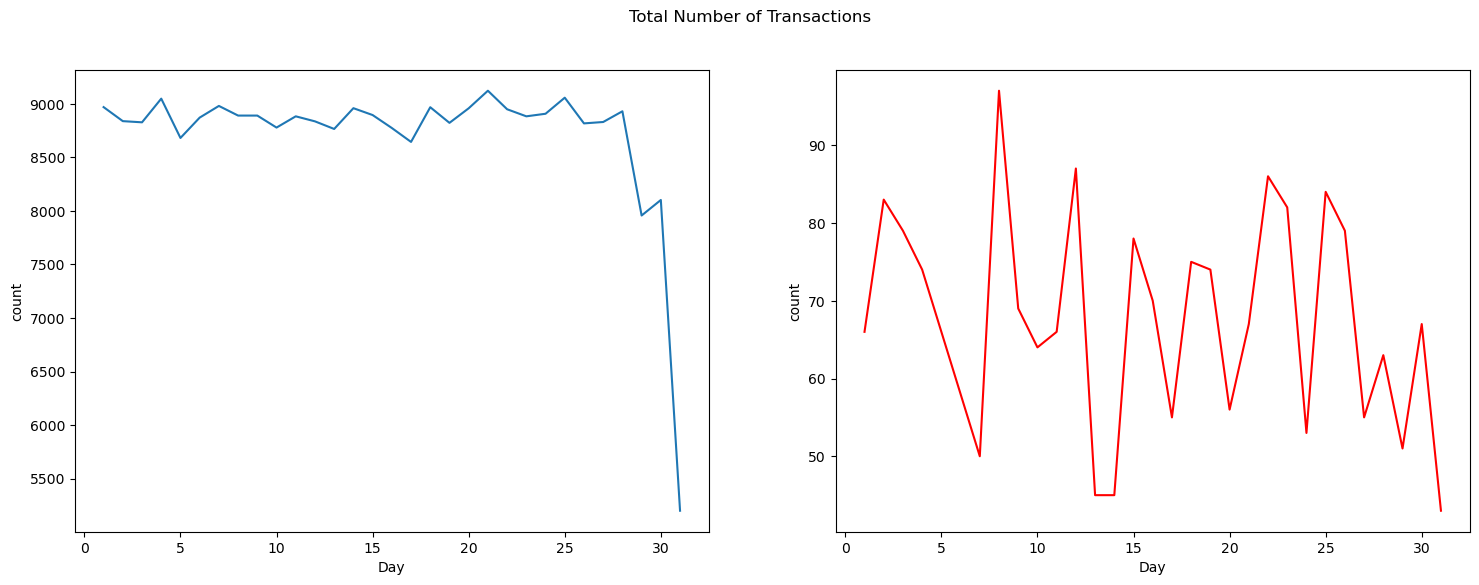

In [12]:
#plotting the fraud and non-fradulent transactions against the total number of transactions in the data set
fig_number_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="count", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="count", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

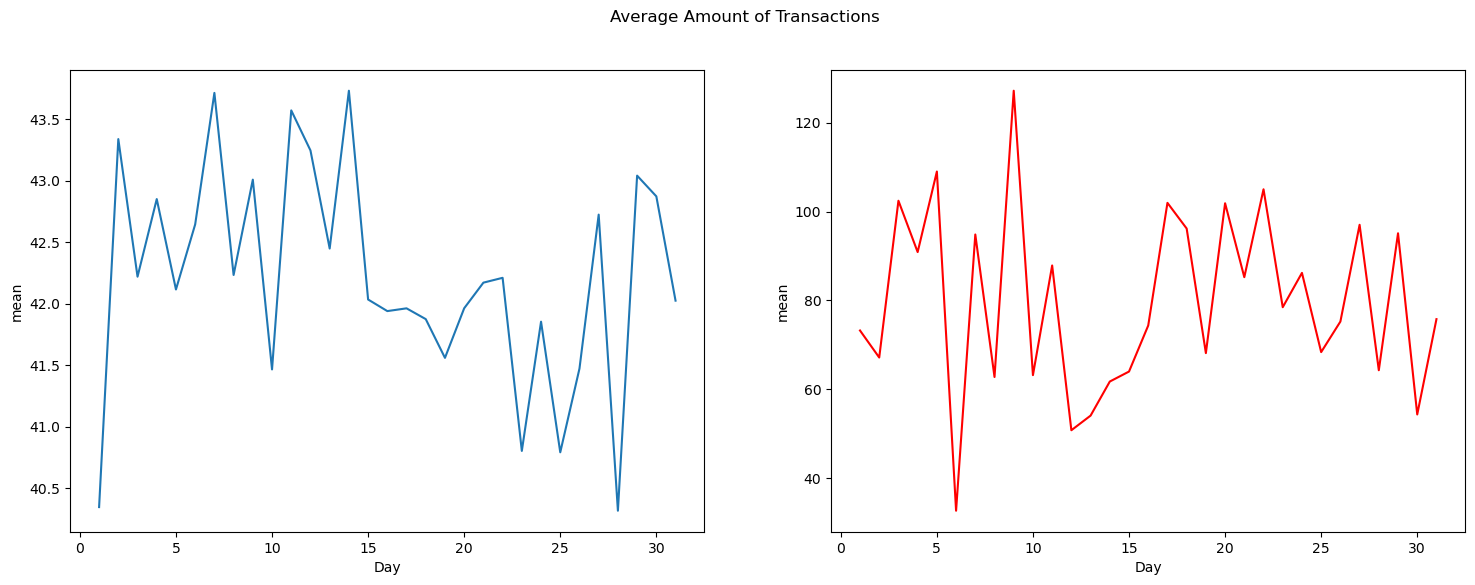

In [13]:
#plotting the fraud and non-fradulent transactions against the average amount of transactions per day in the data set
fig_mean_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="mean", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="mean", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

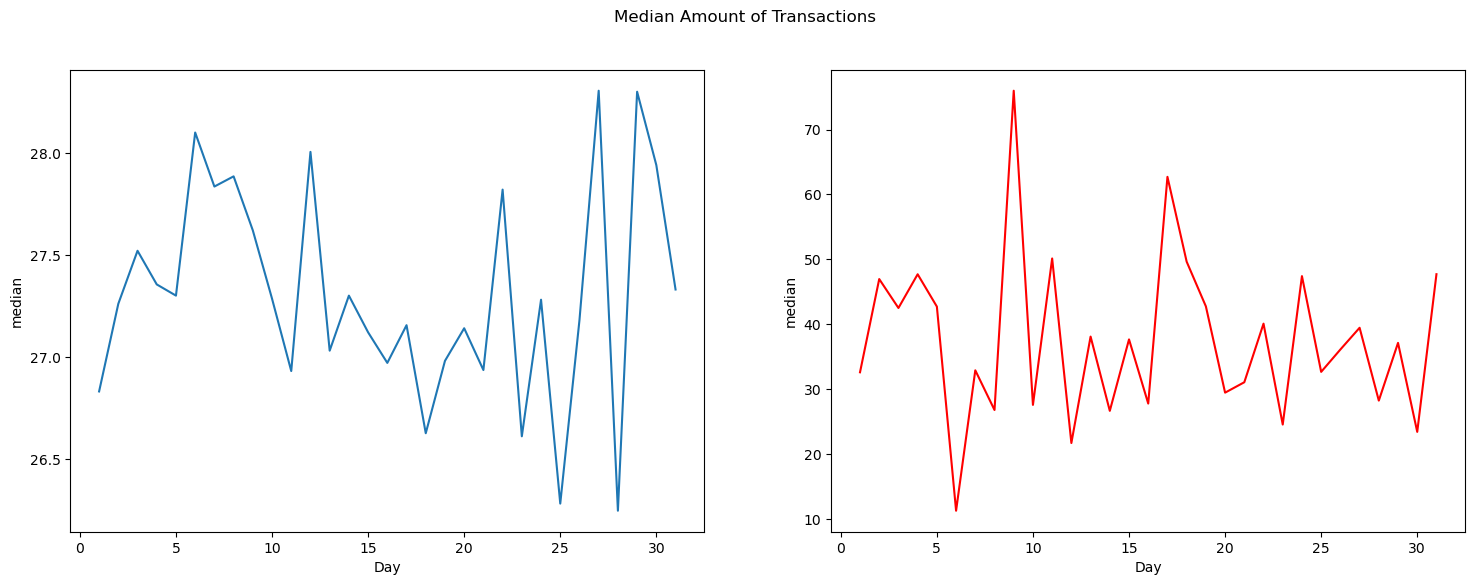

In [14]:
#plotting the fraud and non-fradulent transactions against the median amount of transactions in the data set
fig_median_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="median", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="median", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

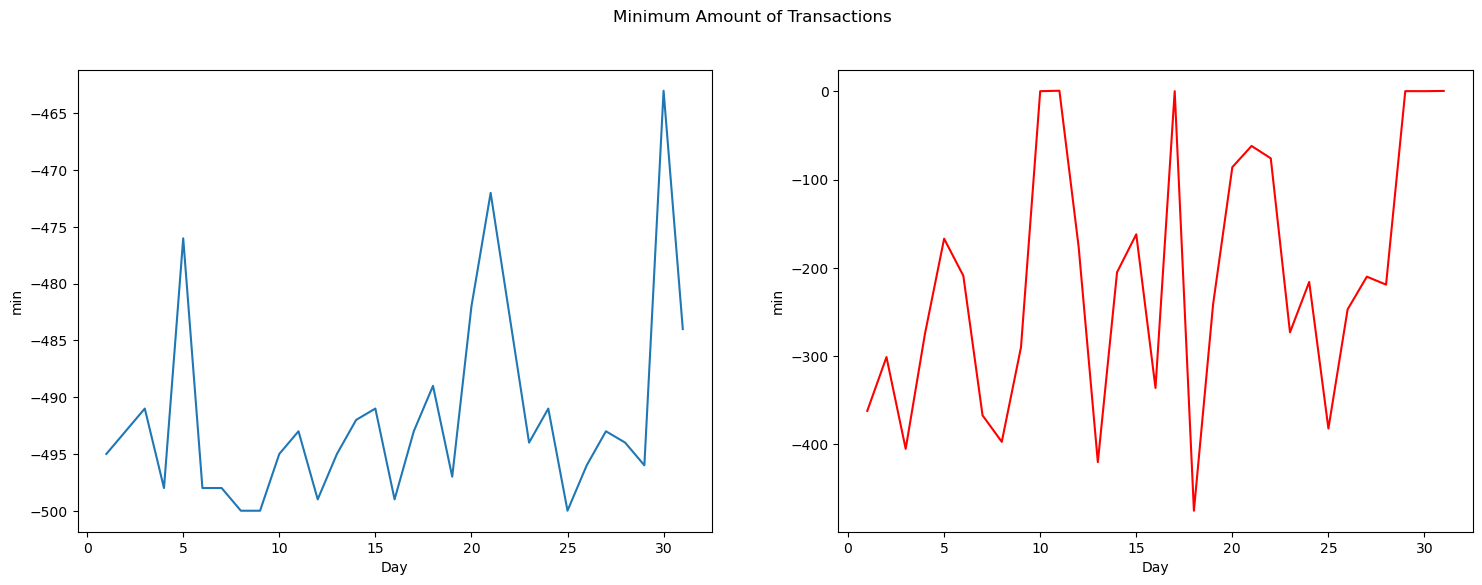

In [15]:
#plotting the fraud and non-fradulent transactions against the minimum amount of transactions in the data set
fig_min_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="min", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="min", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

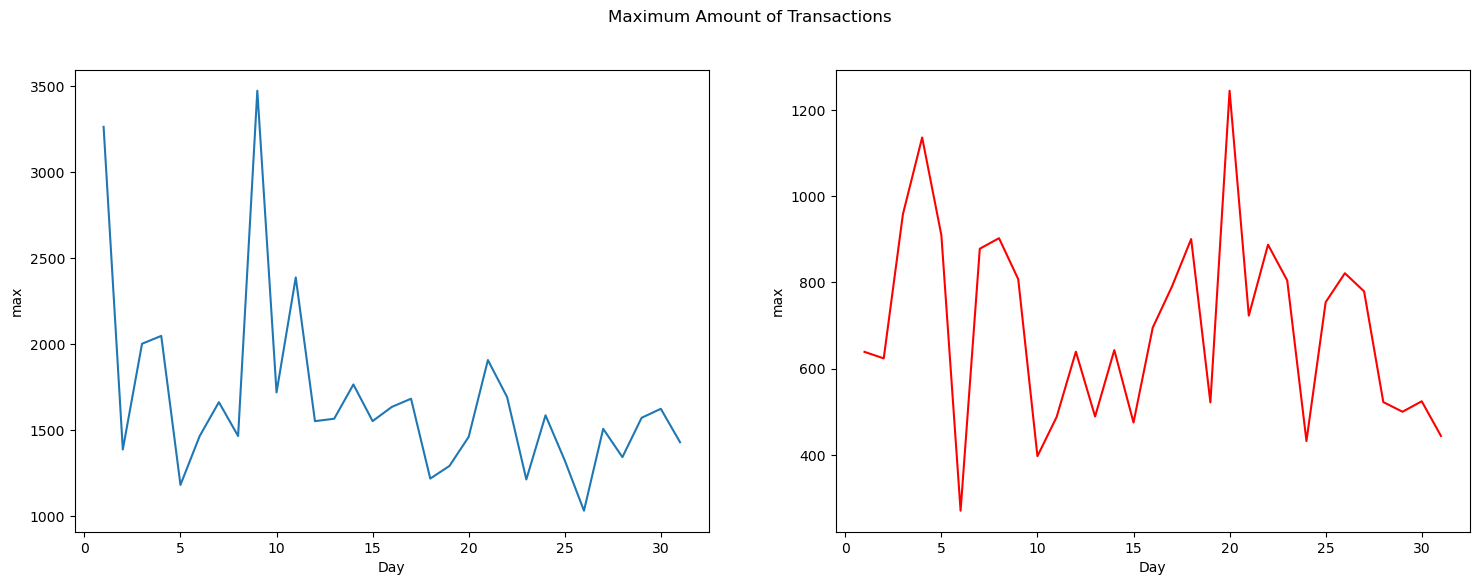

In [16]:
#plotting the fraud and non-fradulent transactions against the maximum amount in transactions in the data set
fig_max_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="max", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="max", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

## Analytical of Monthly features...

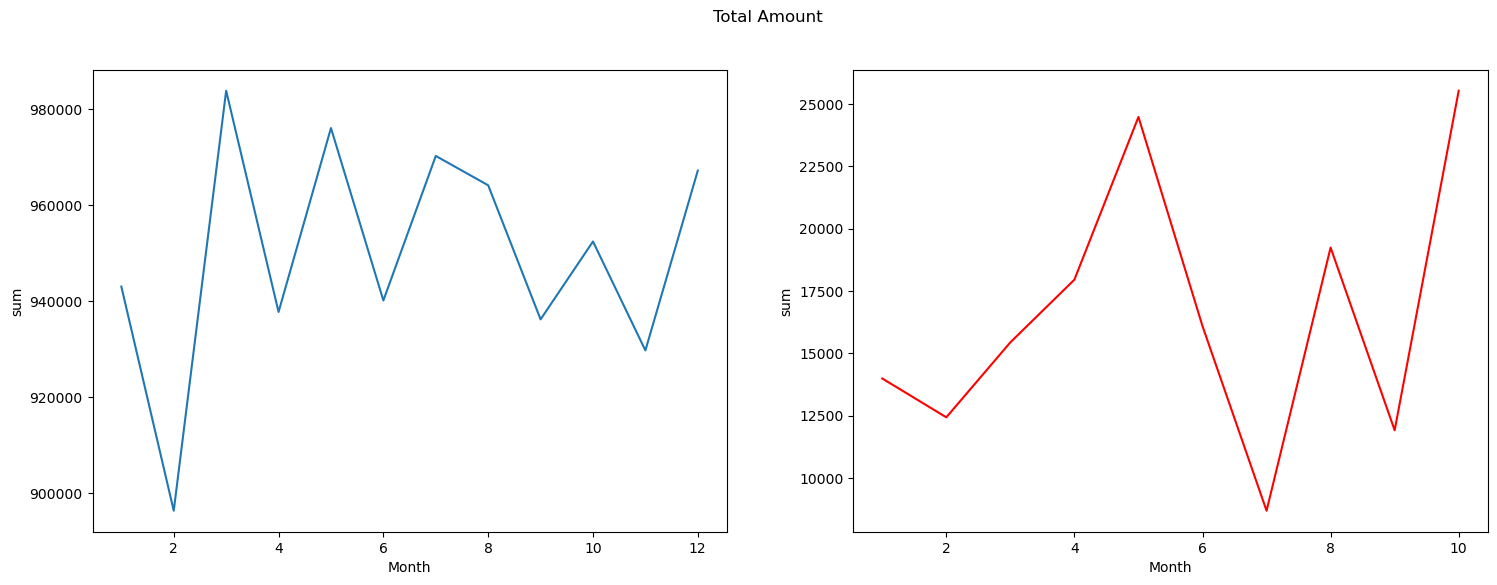

In [17]:
#creating the dataframe for the statistical plots
monthly= cct.groupby(['Month','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
#plotting the fraud and non-fradulent transactions against the total amount in the data set
fig_amount_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="sum", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="sum", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show()

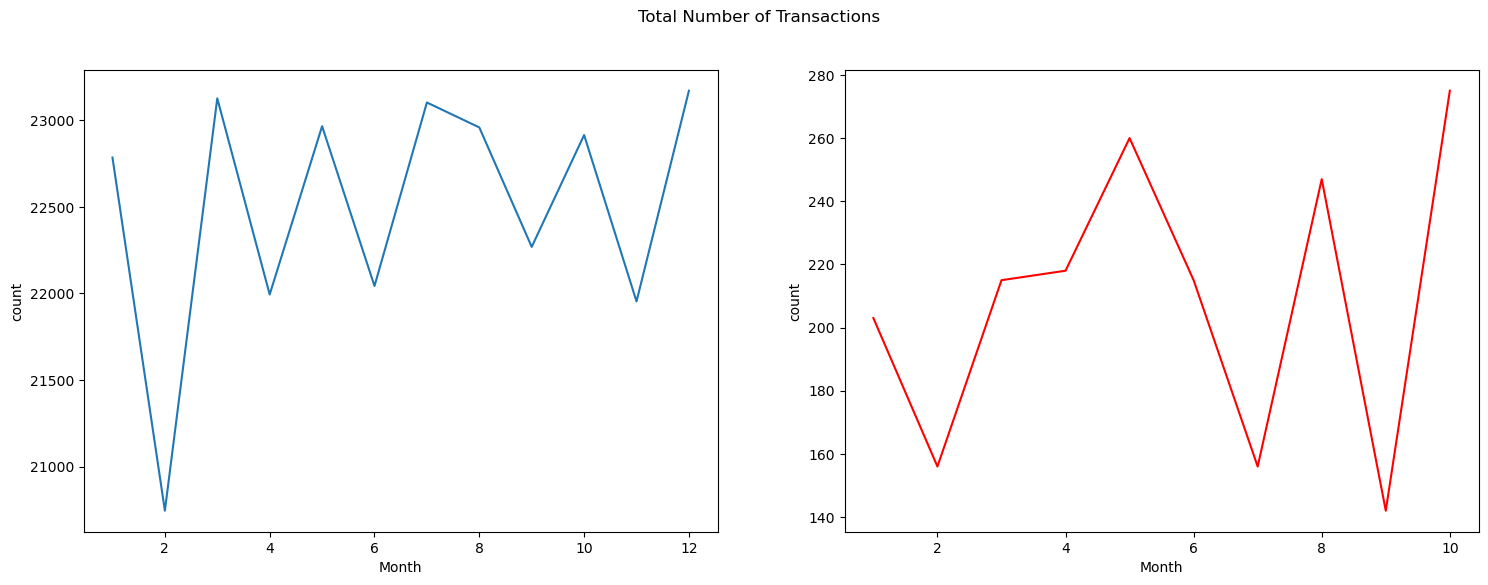

In [18]:
#plotting the fraud and non-fradulent transactions against the total number of transactions in the data set
fig_number_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="count", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="count", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

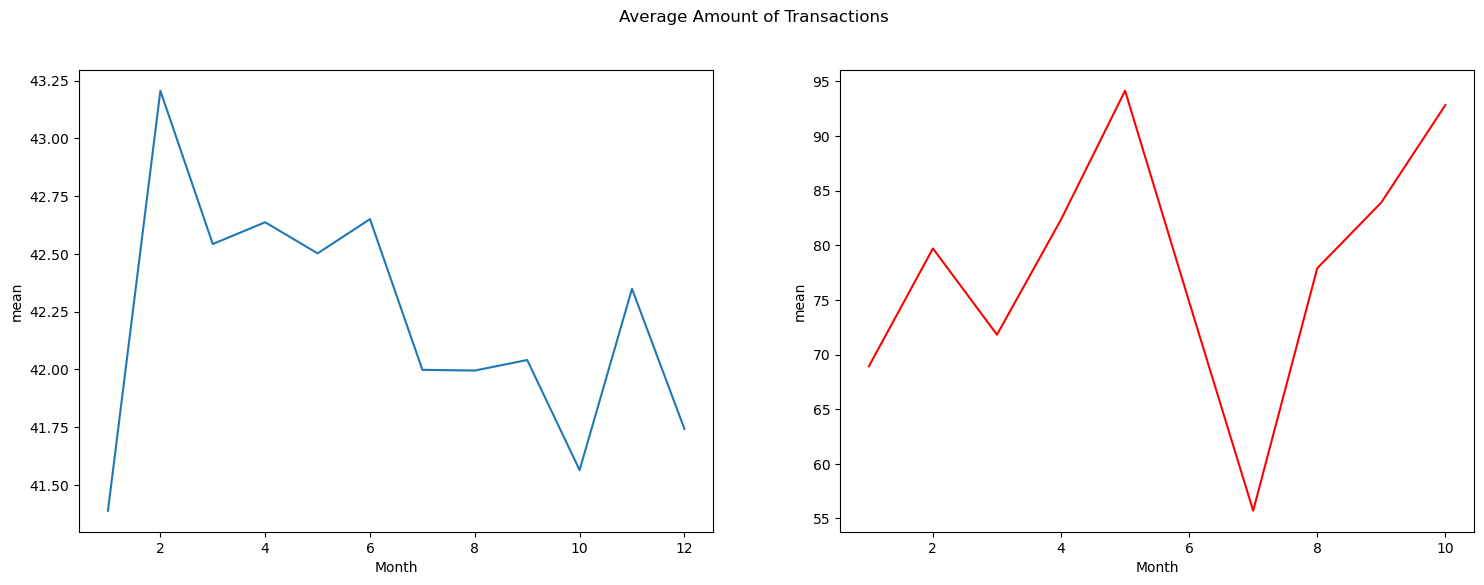

In [19]:
#plotting the fraud and non-fradulent transactions against the average amount of transactions per day in the data set
fig_mean_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="mean", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="mean", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

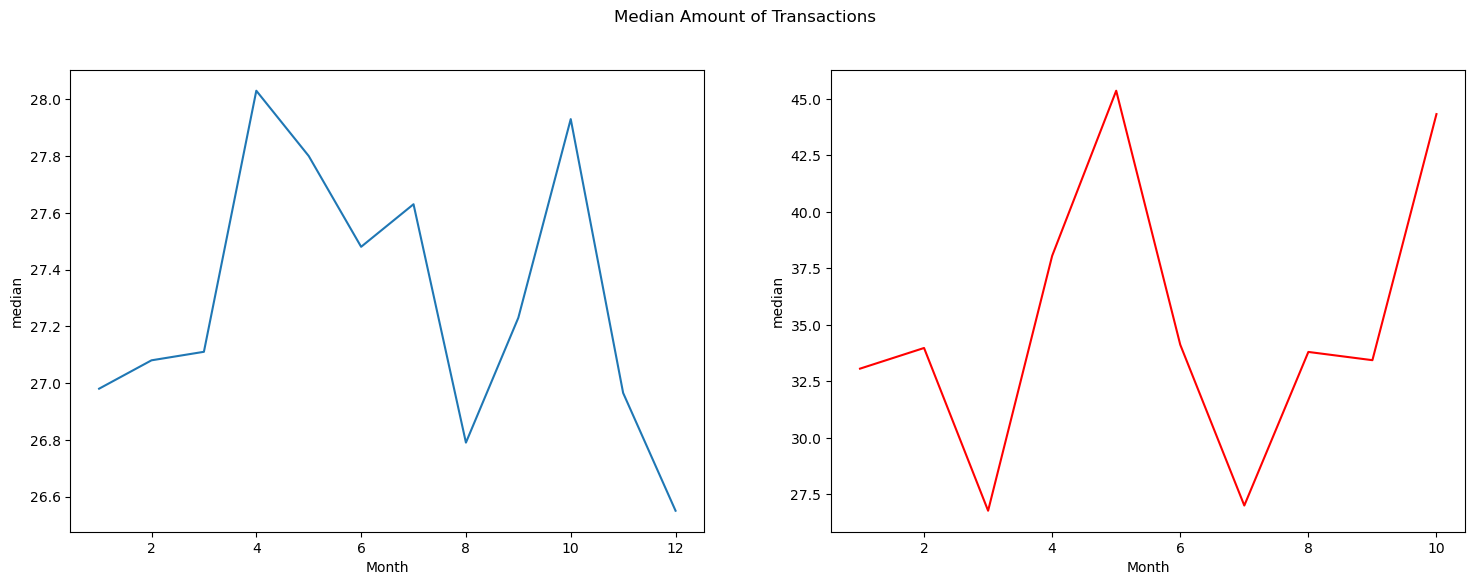

In [20]:
#plotting the fraud and non-fradulent transactions against the median amount of transactions in the data set
fig_median_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="median", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="median", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

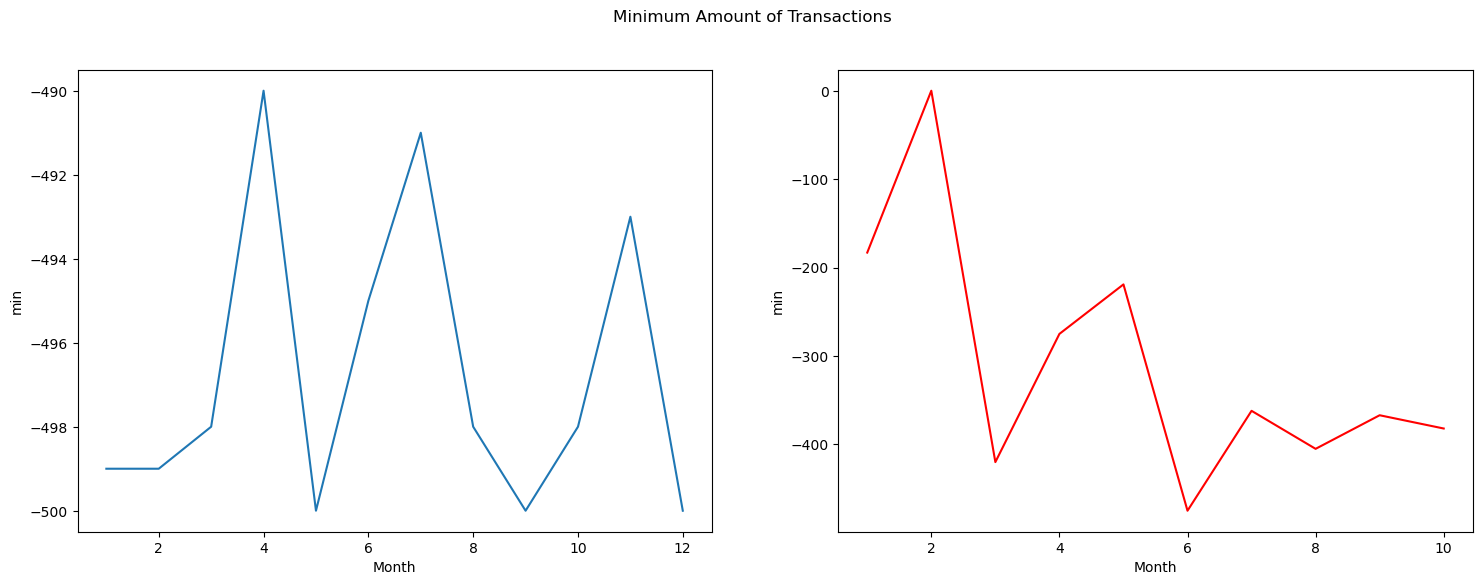

In [21]:
#plotting the fraud and non-fradulent transactions against the minimum amount of transactions in the data set
fig_min_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="min", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="min", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

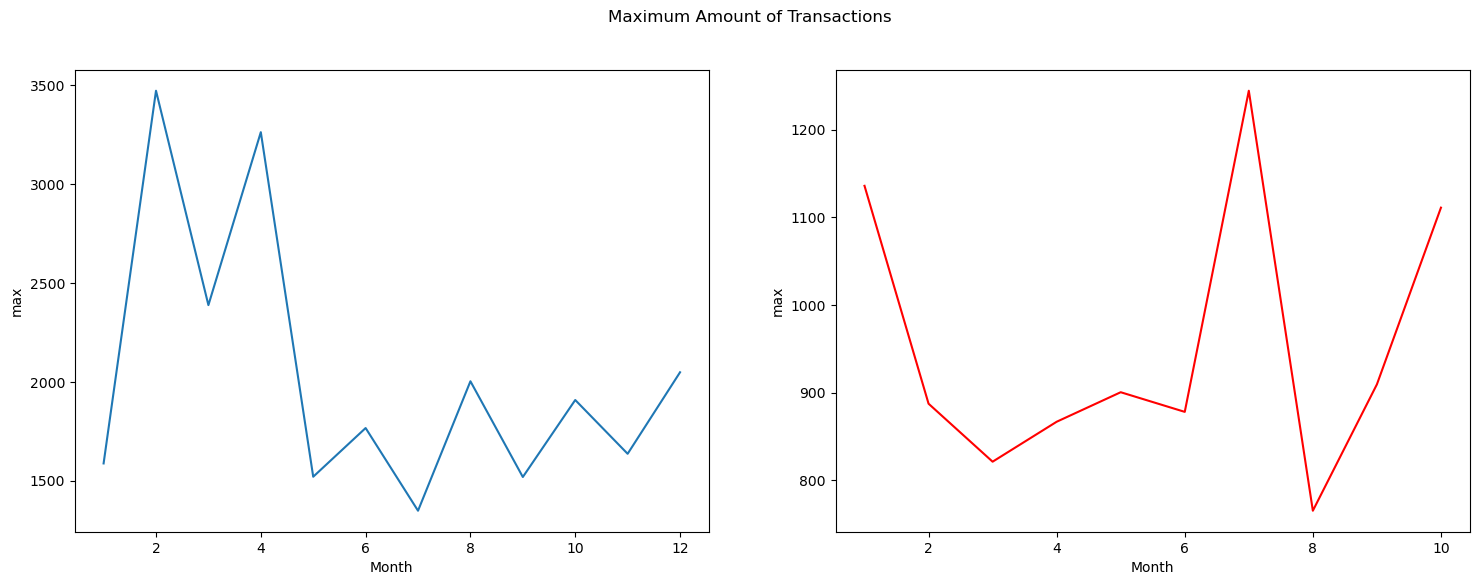

In [22]:
#plotting the fraud and non-fradulent transactions against the maximum amount in transactions in the data set
fig_max_month, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Month", y="max", data=monthly.loc[monthly.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Month", y="max", data=monthly.loc[monthly.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

## Dashboarding time....

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
        [5] Matplotlib(Figure)
        [6] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
        [5] Matplotlib(Figure)
        [6] Matplotlib(Figure)
    [2] Row
        [0] Matplotlib(Figure)
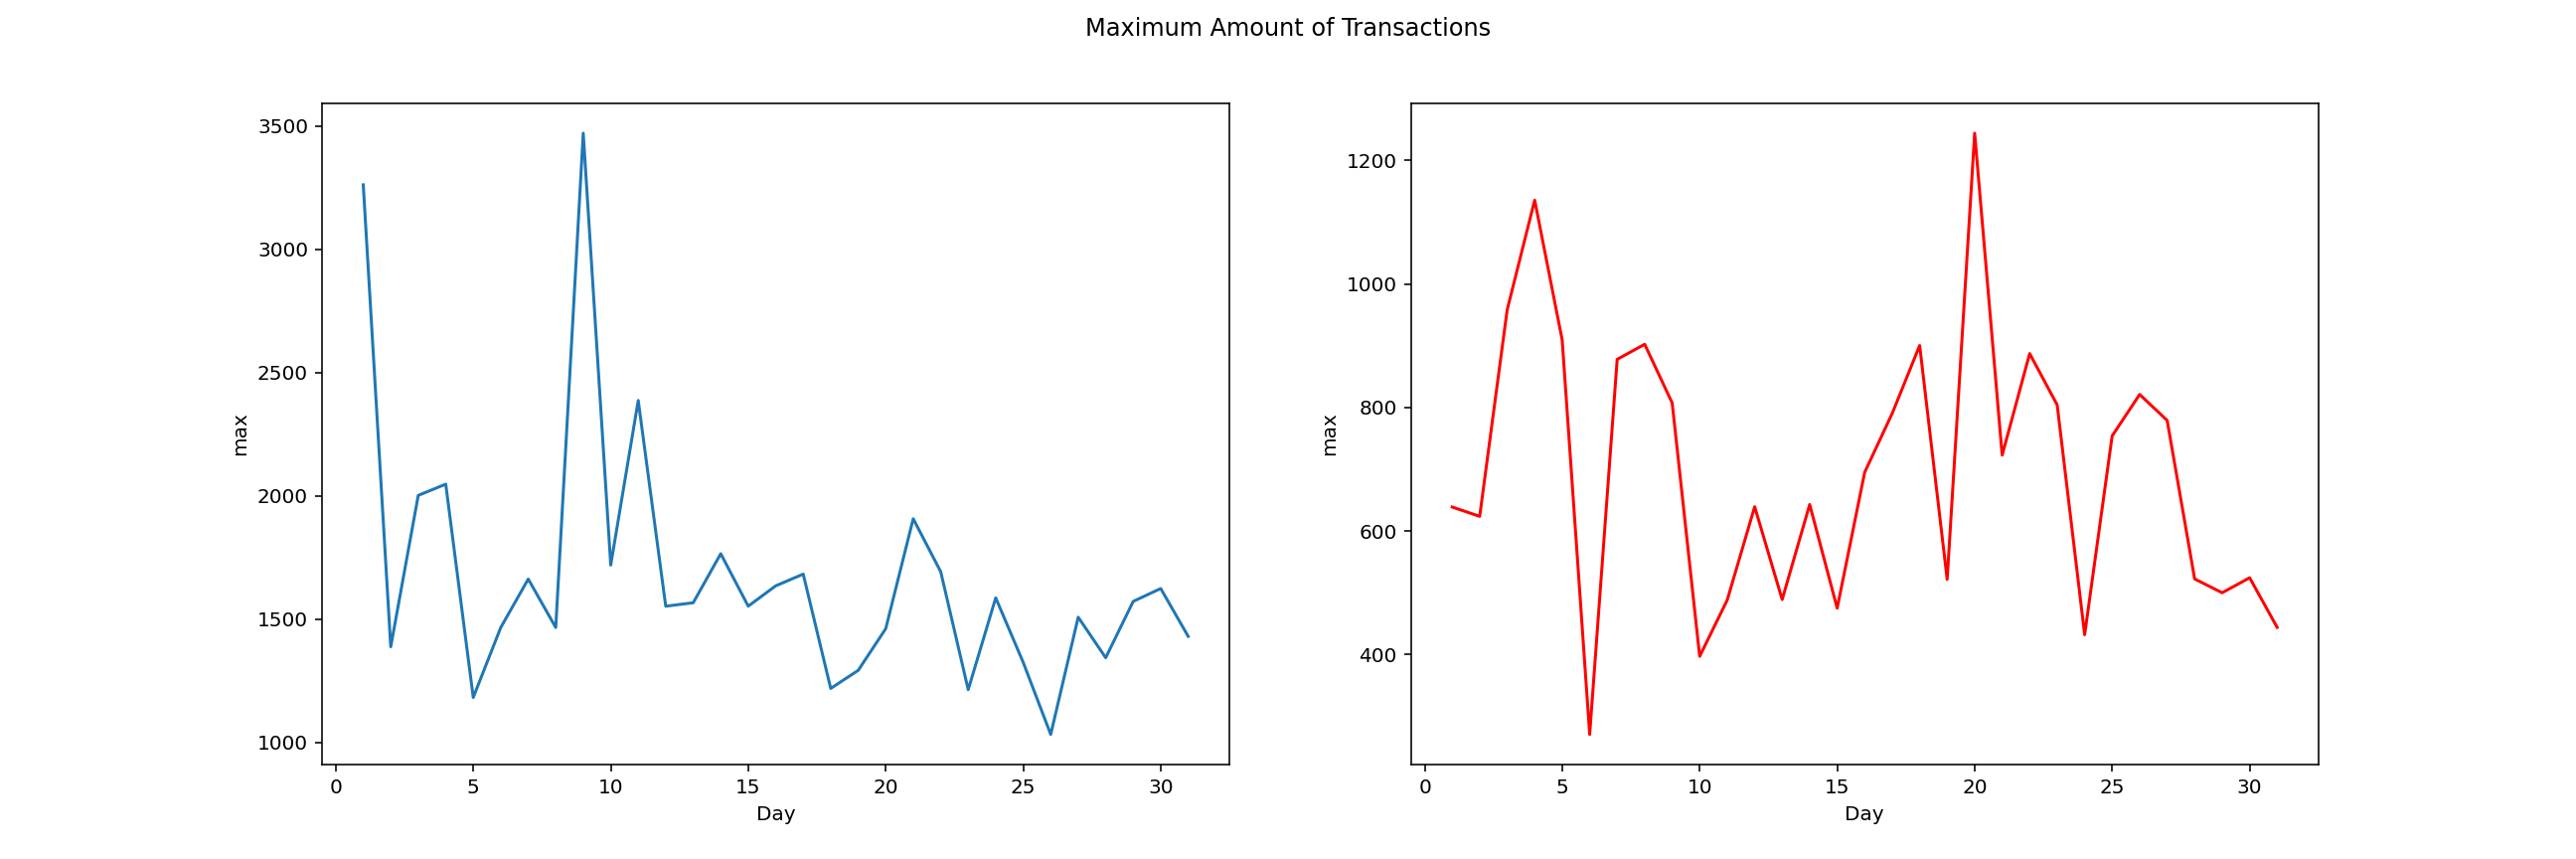
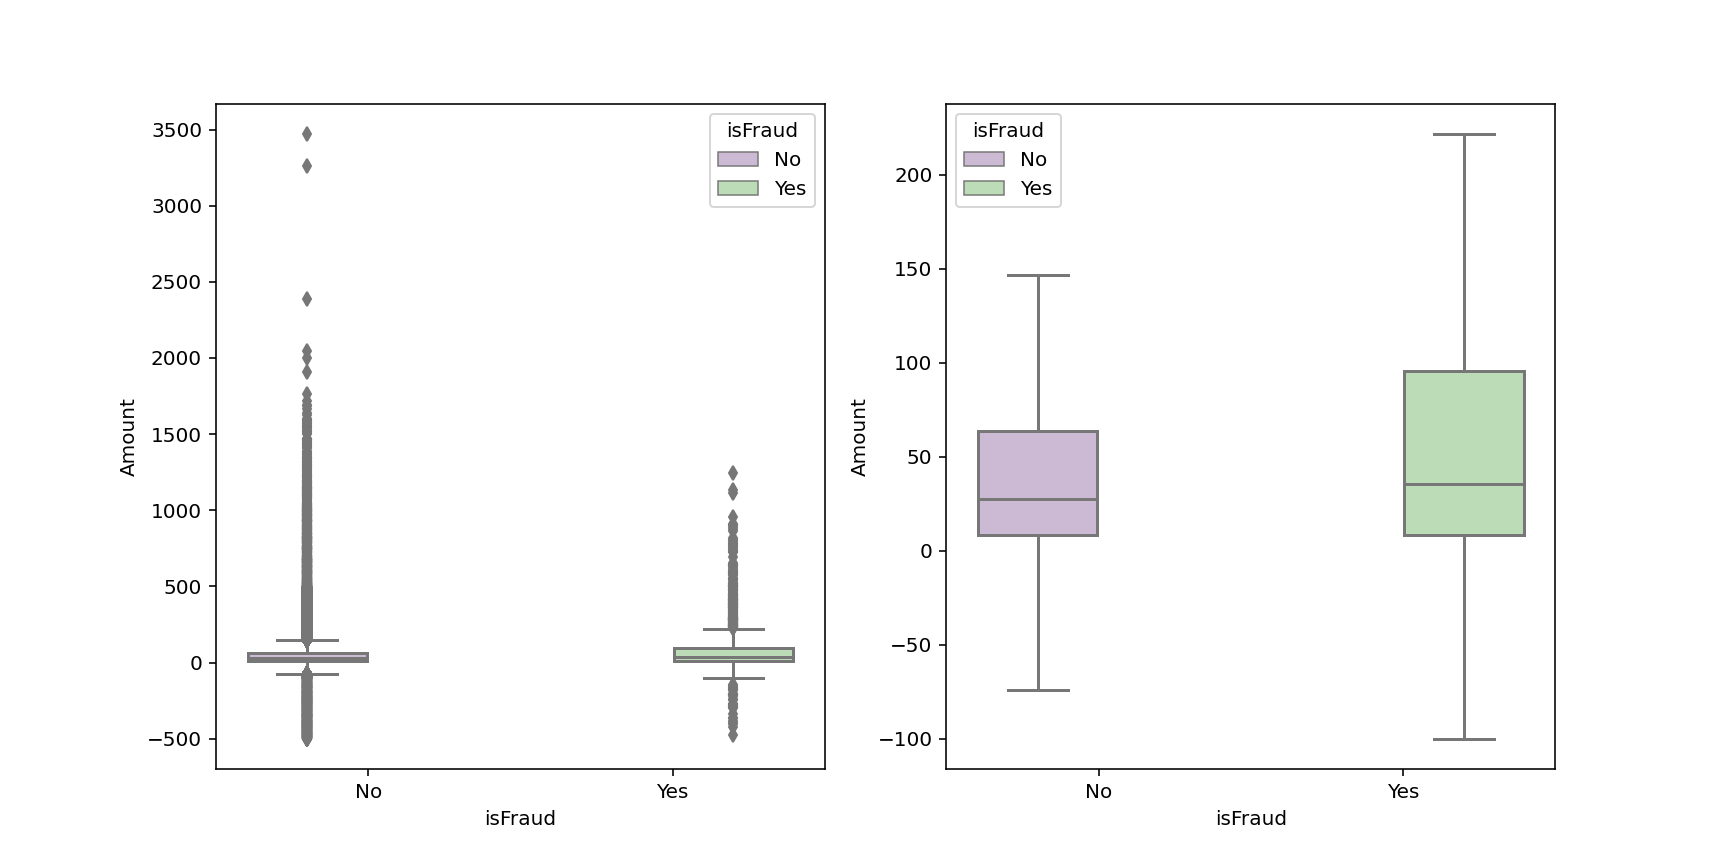
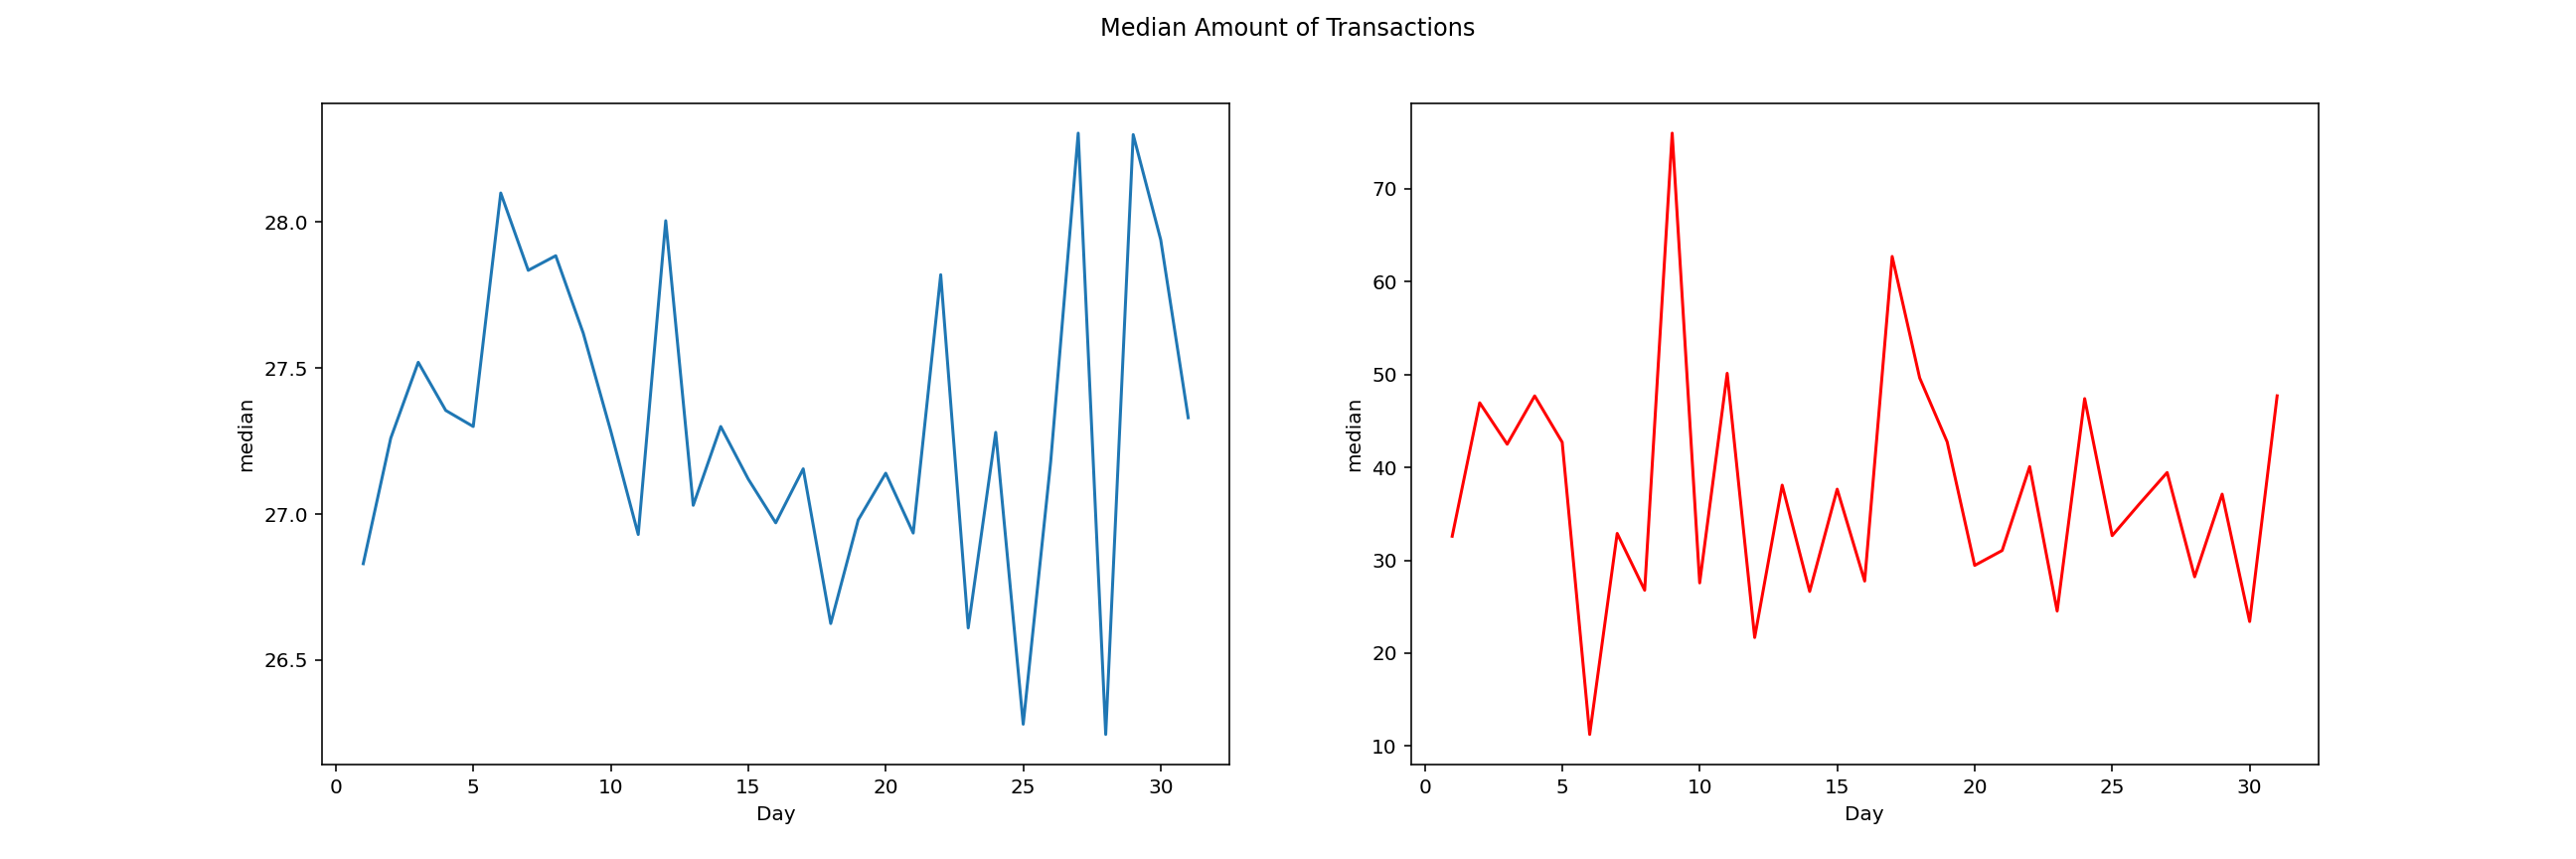
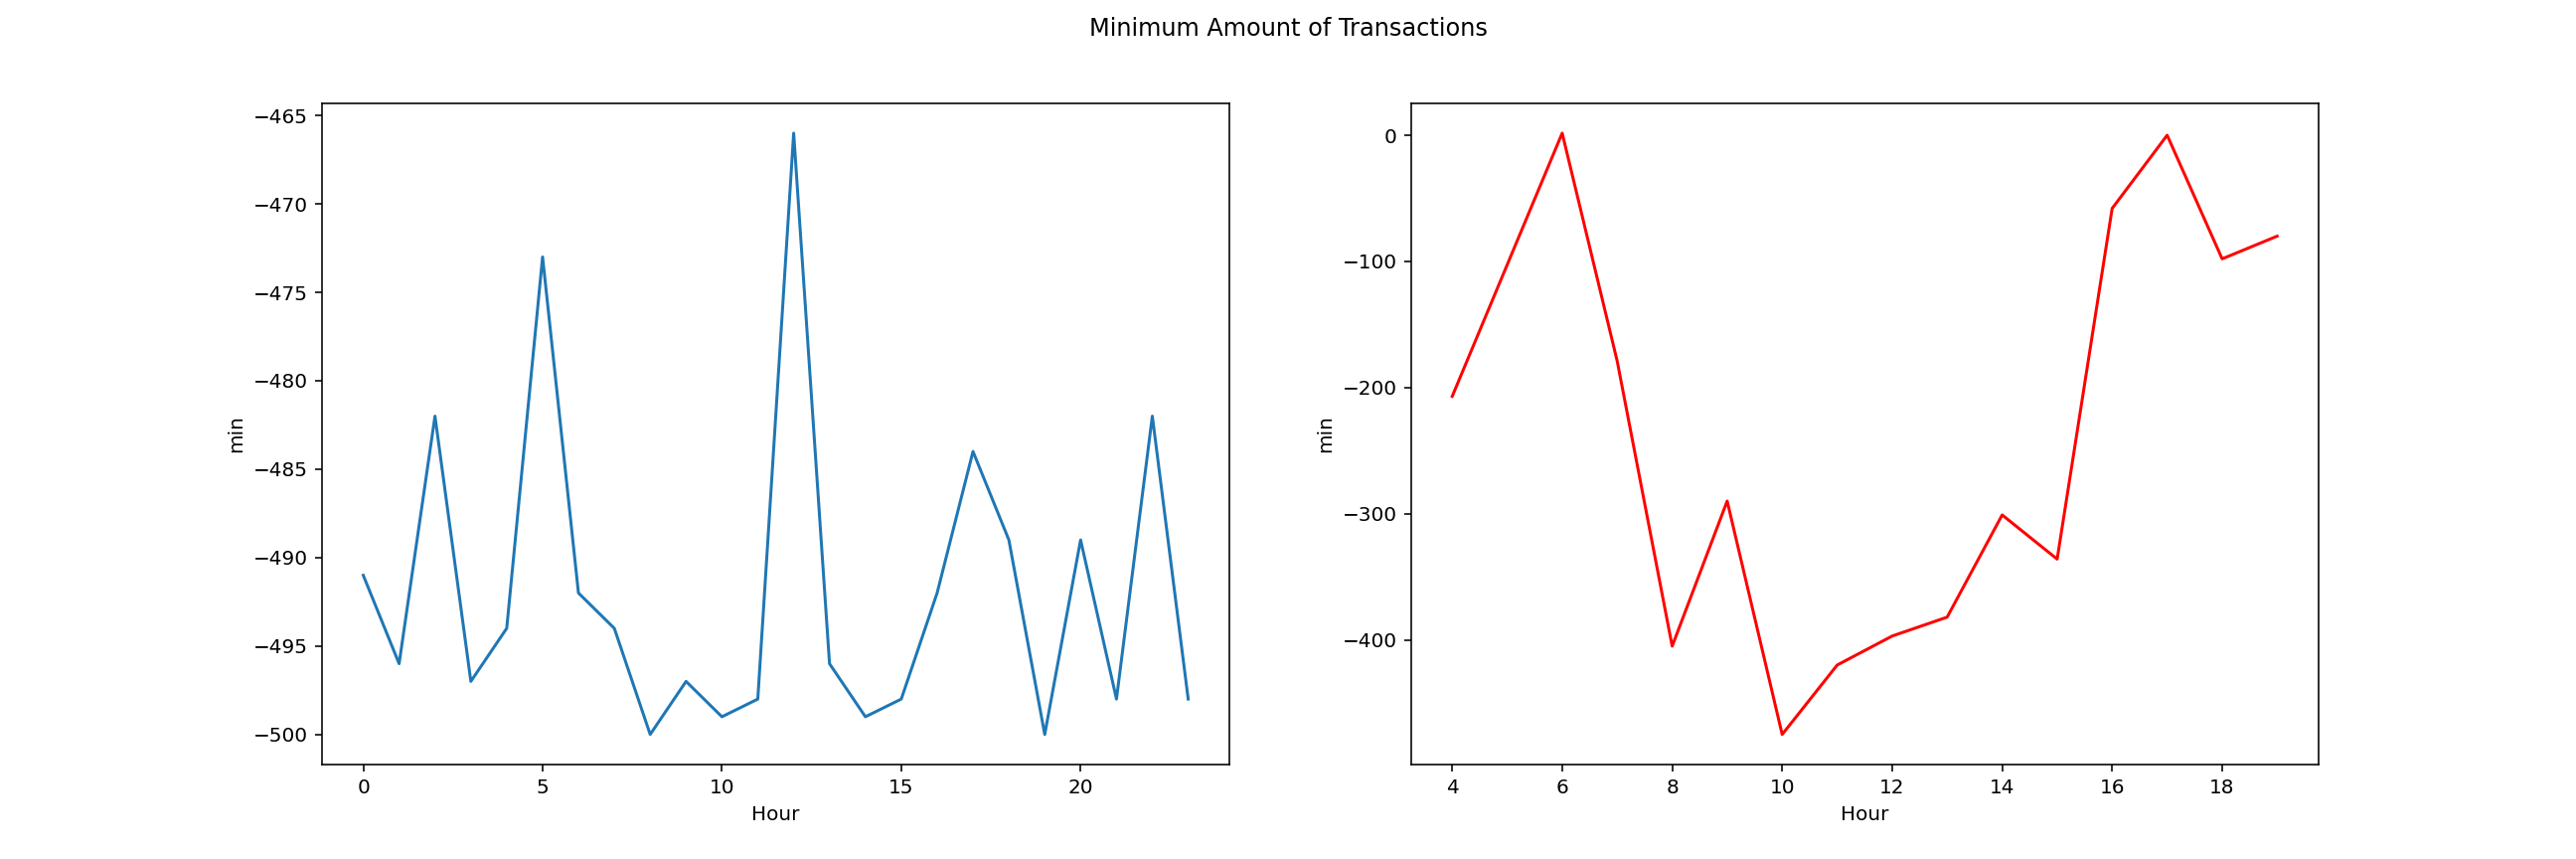
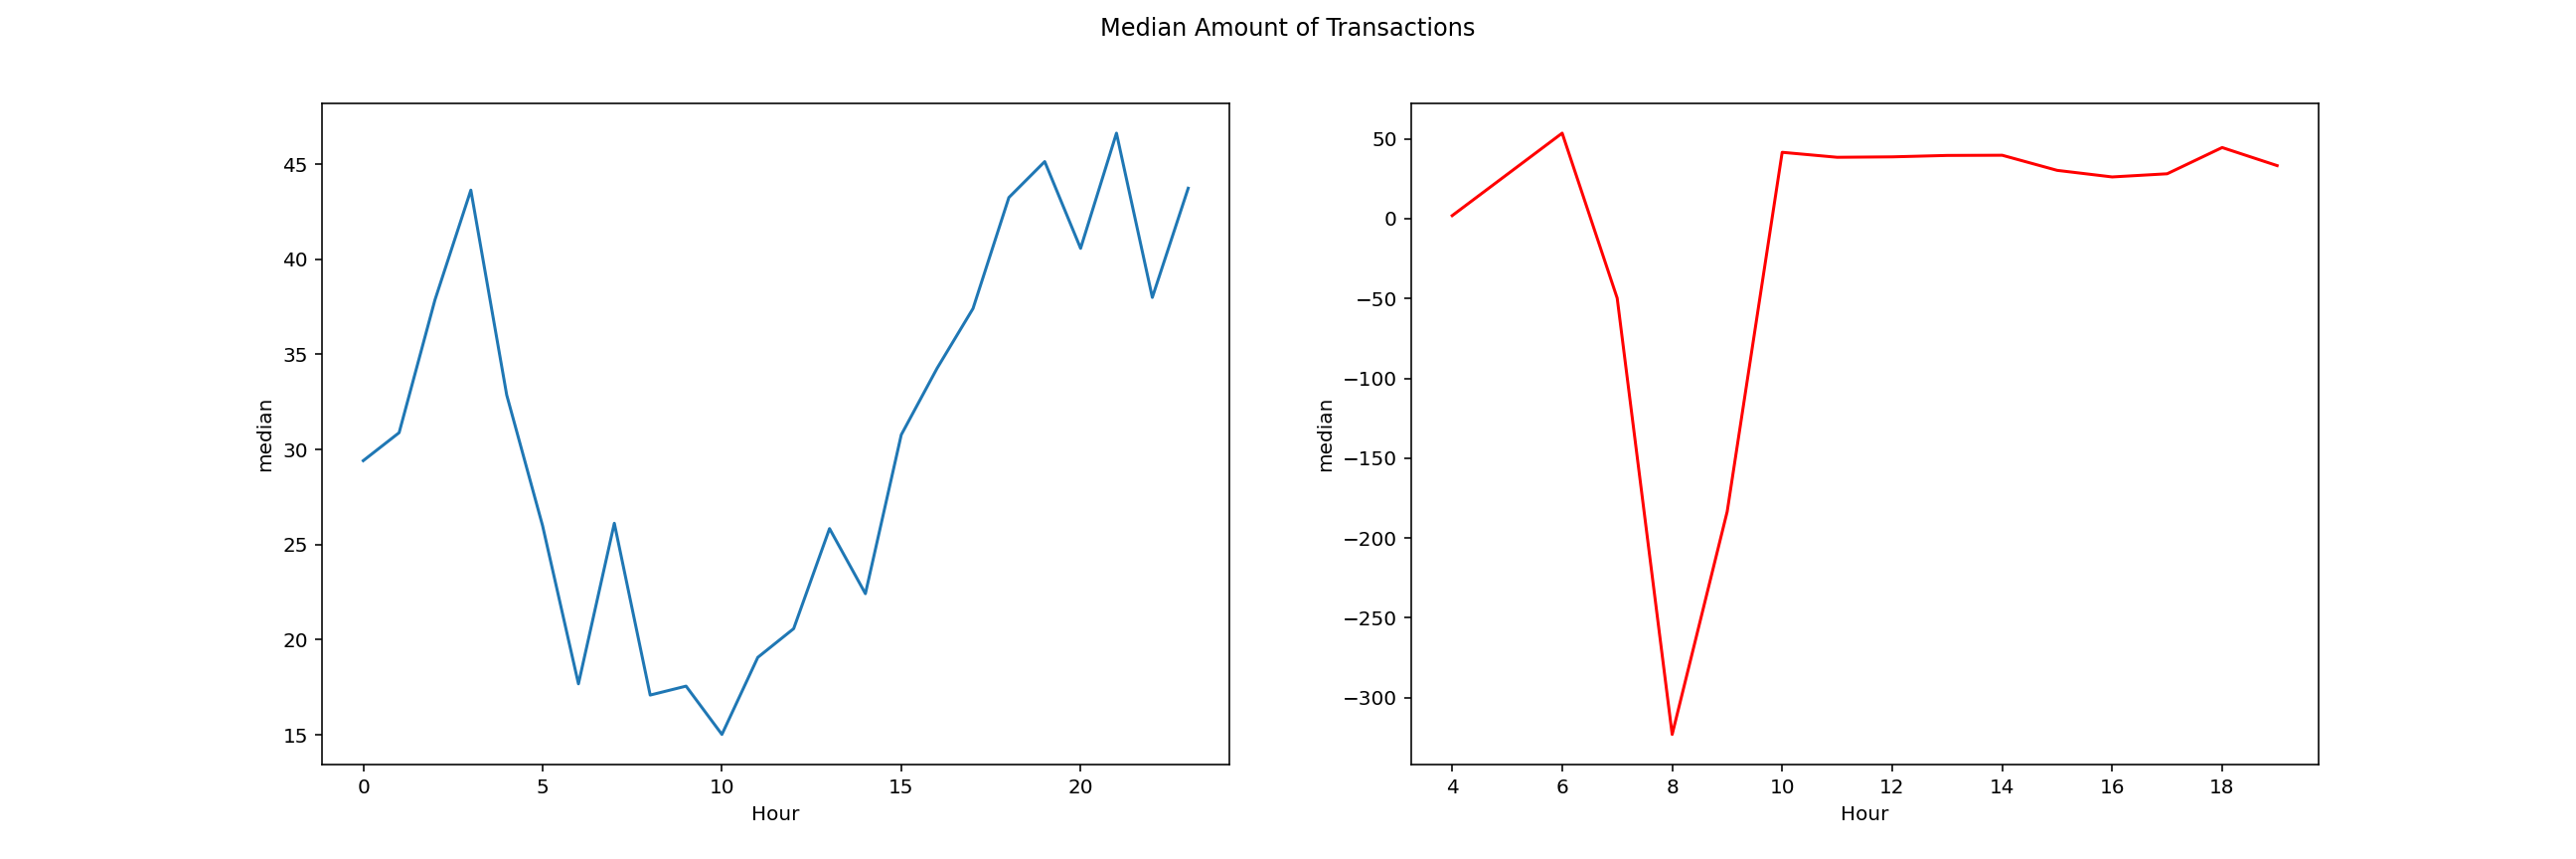
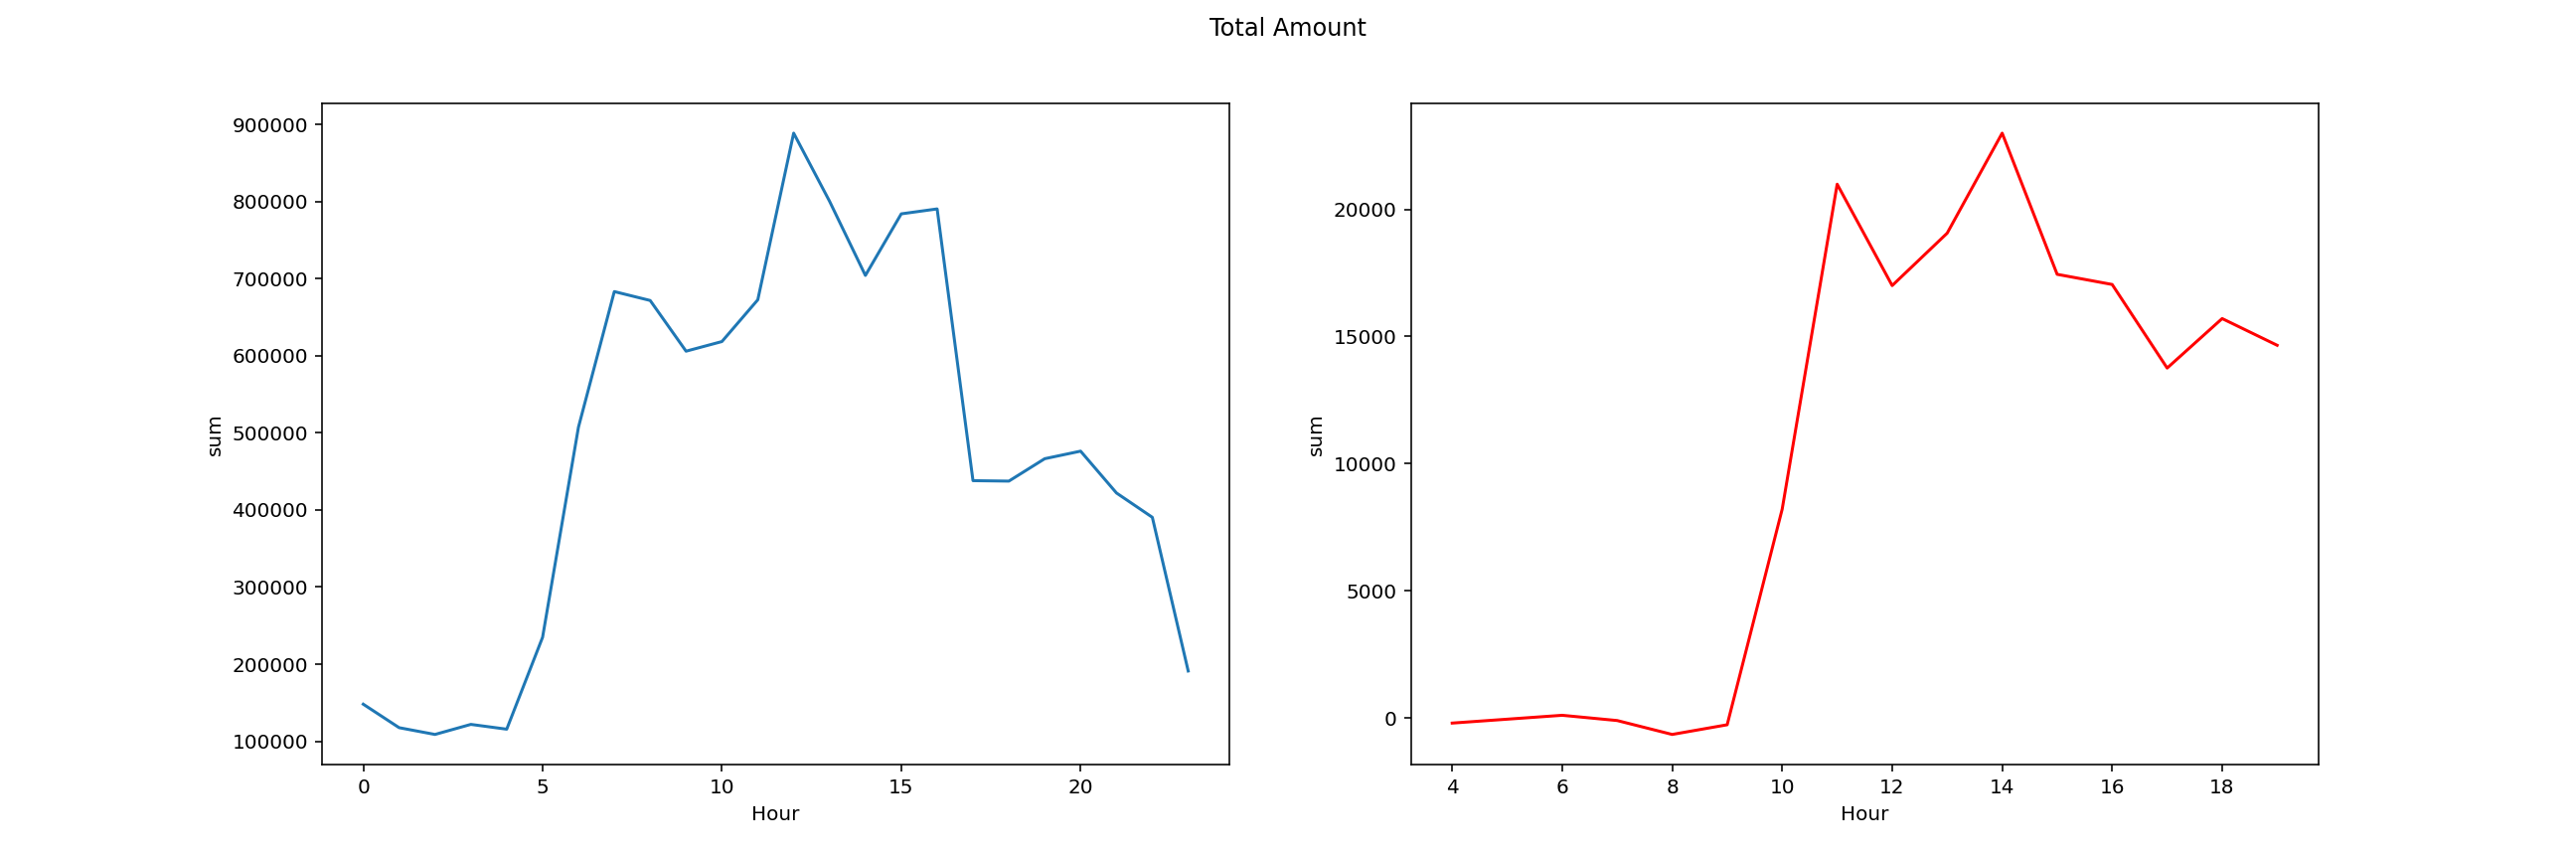
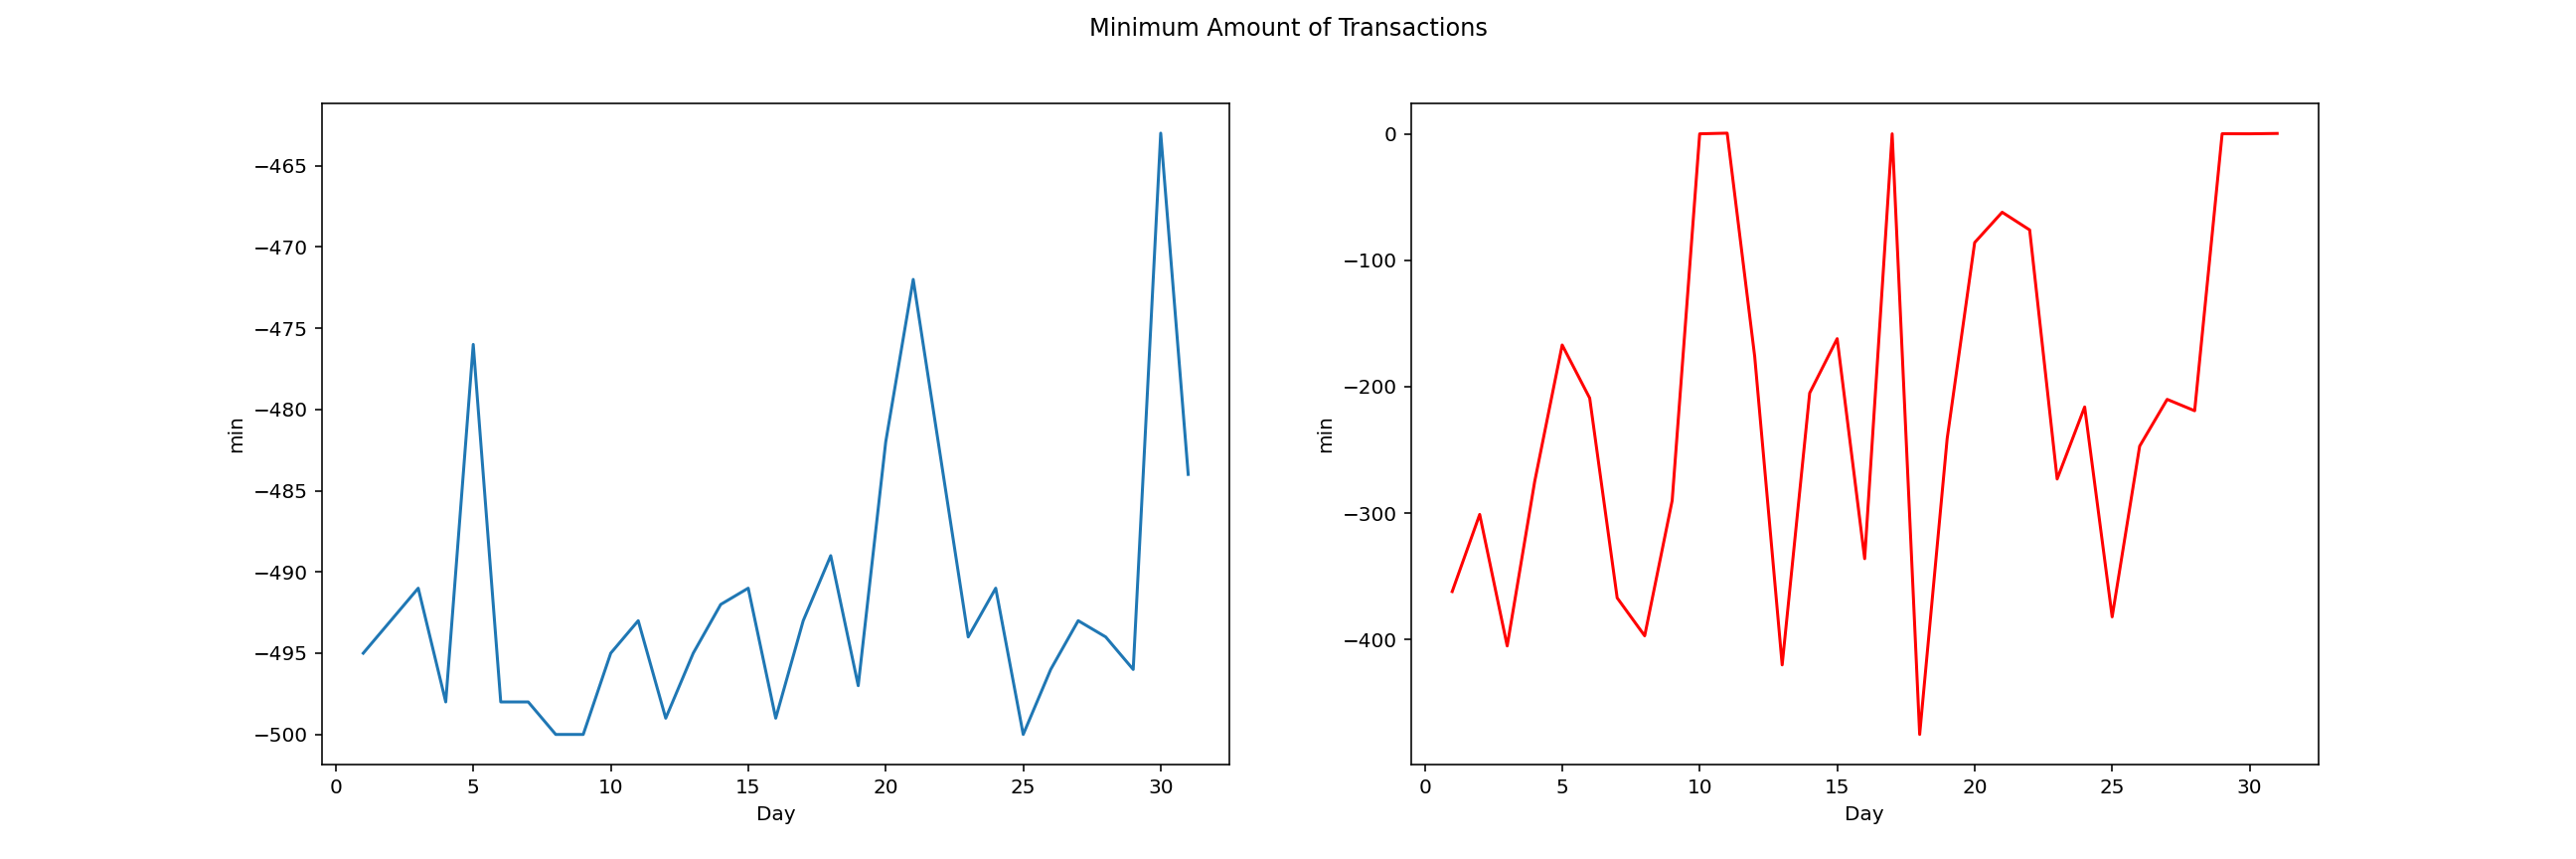
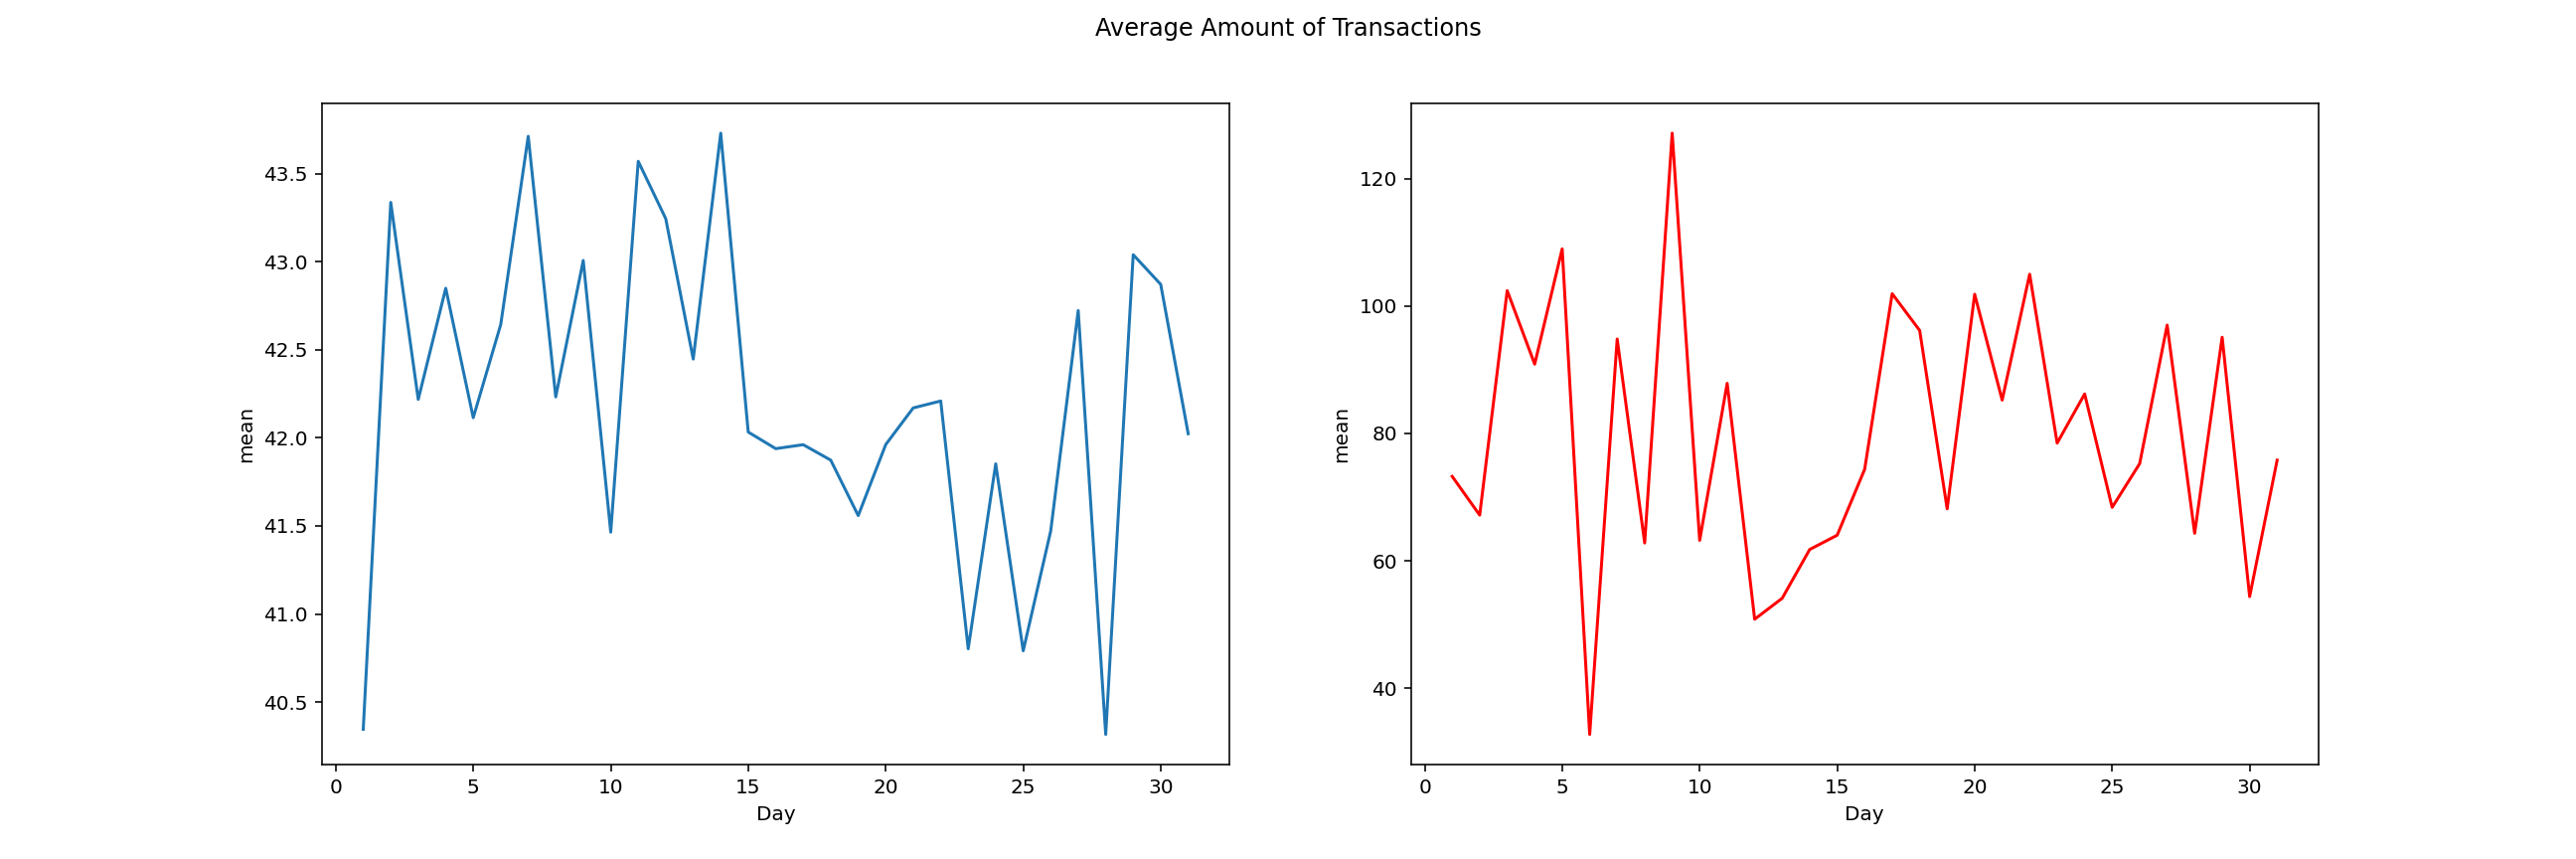
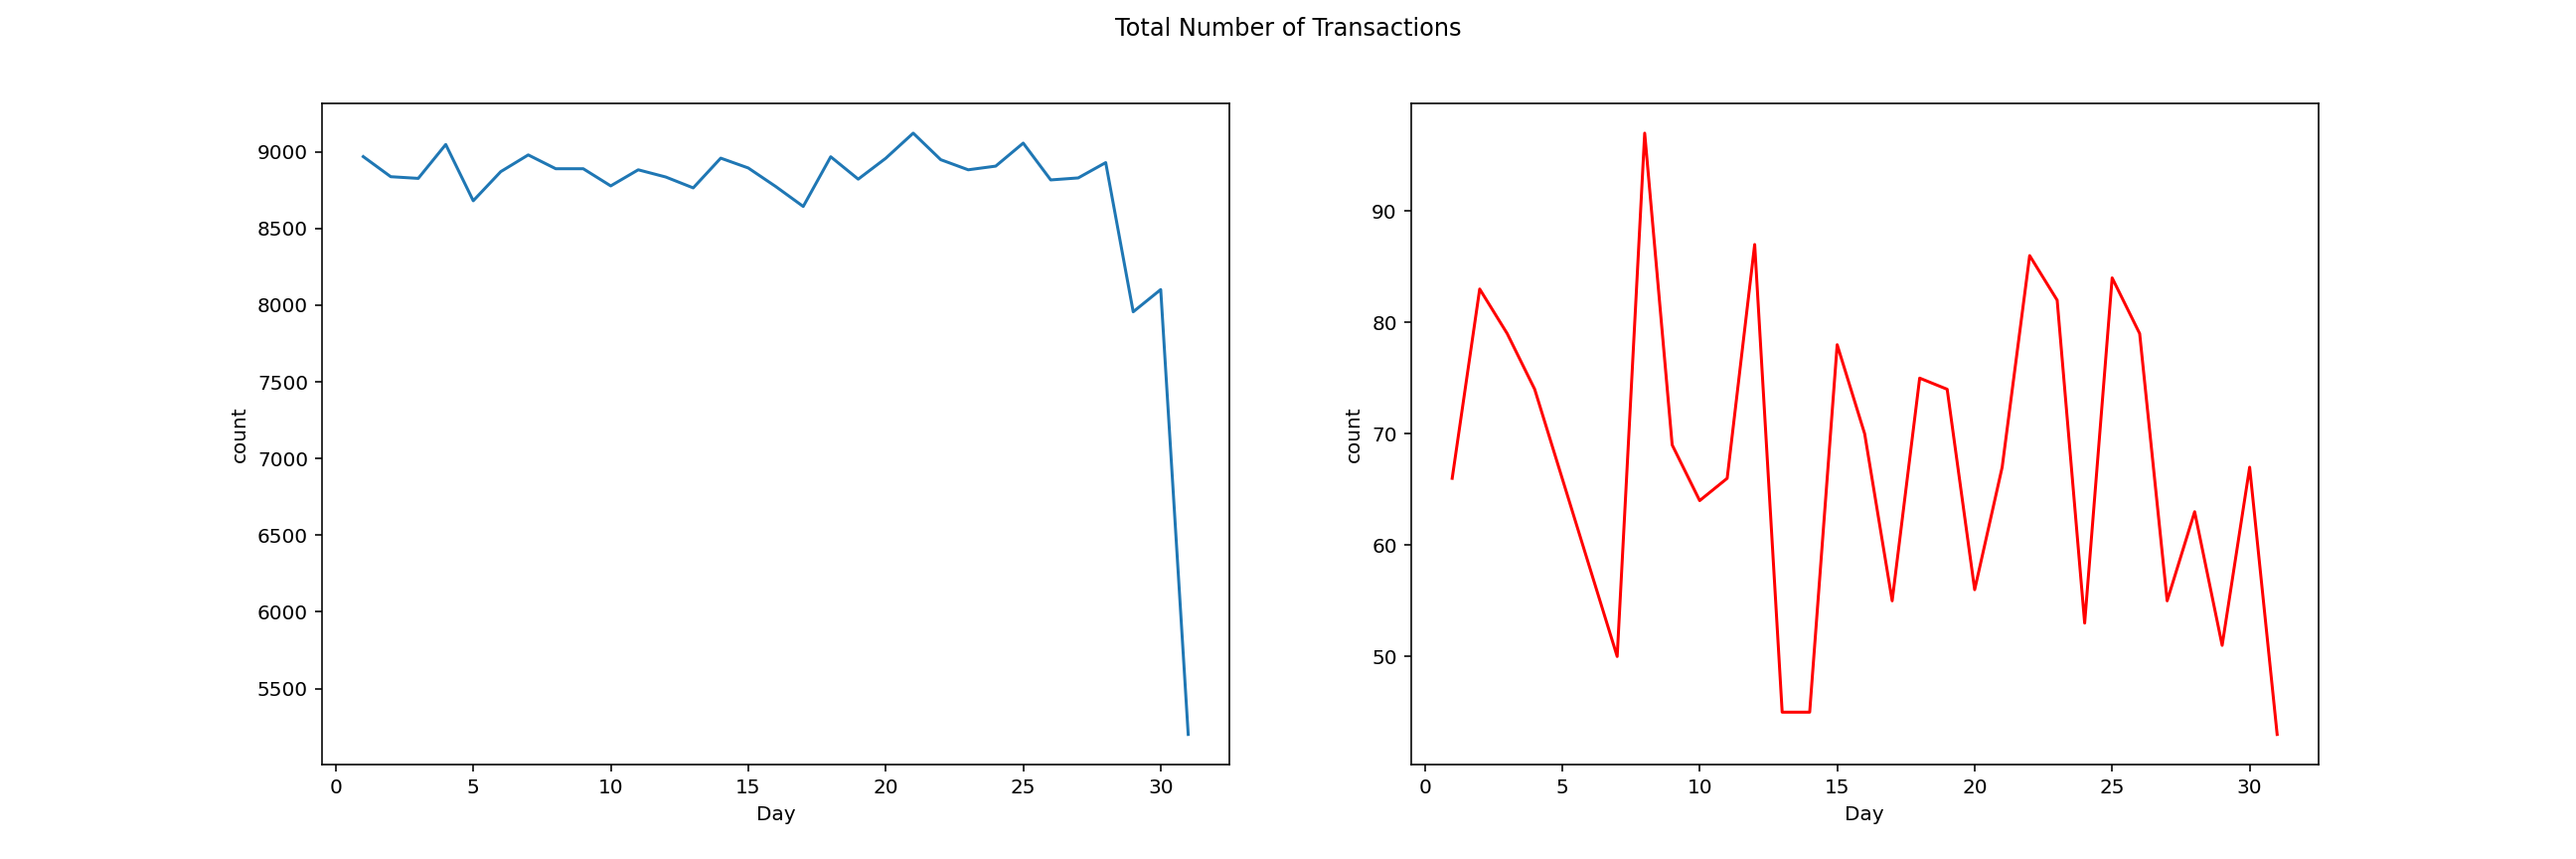
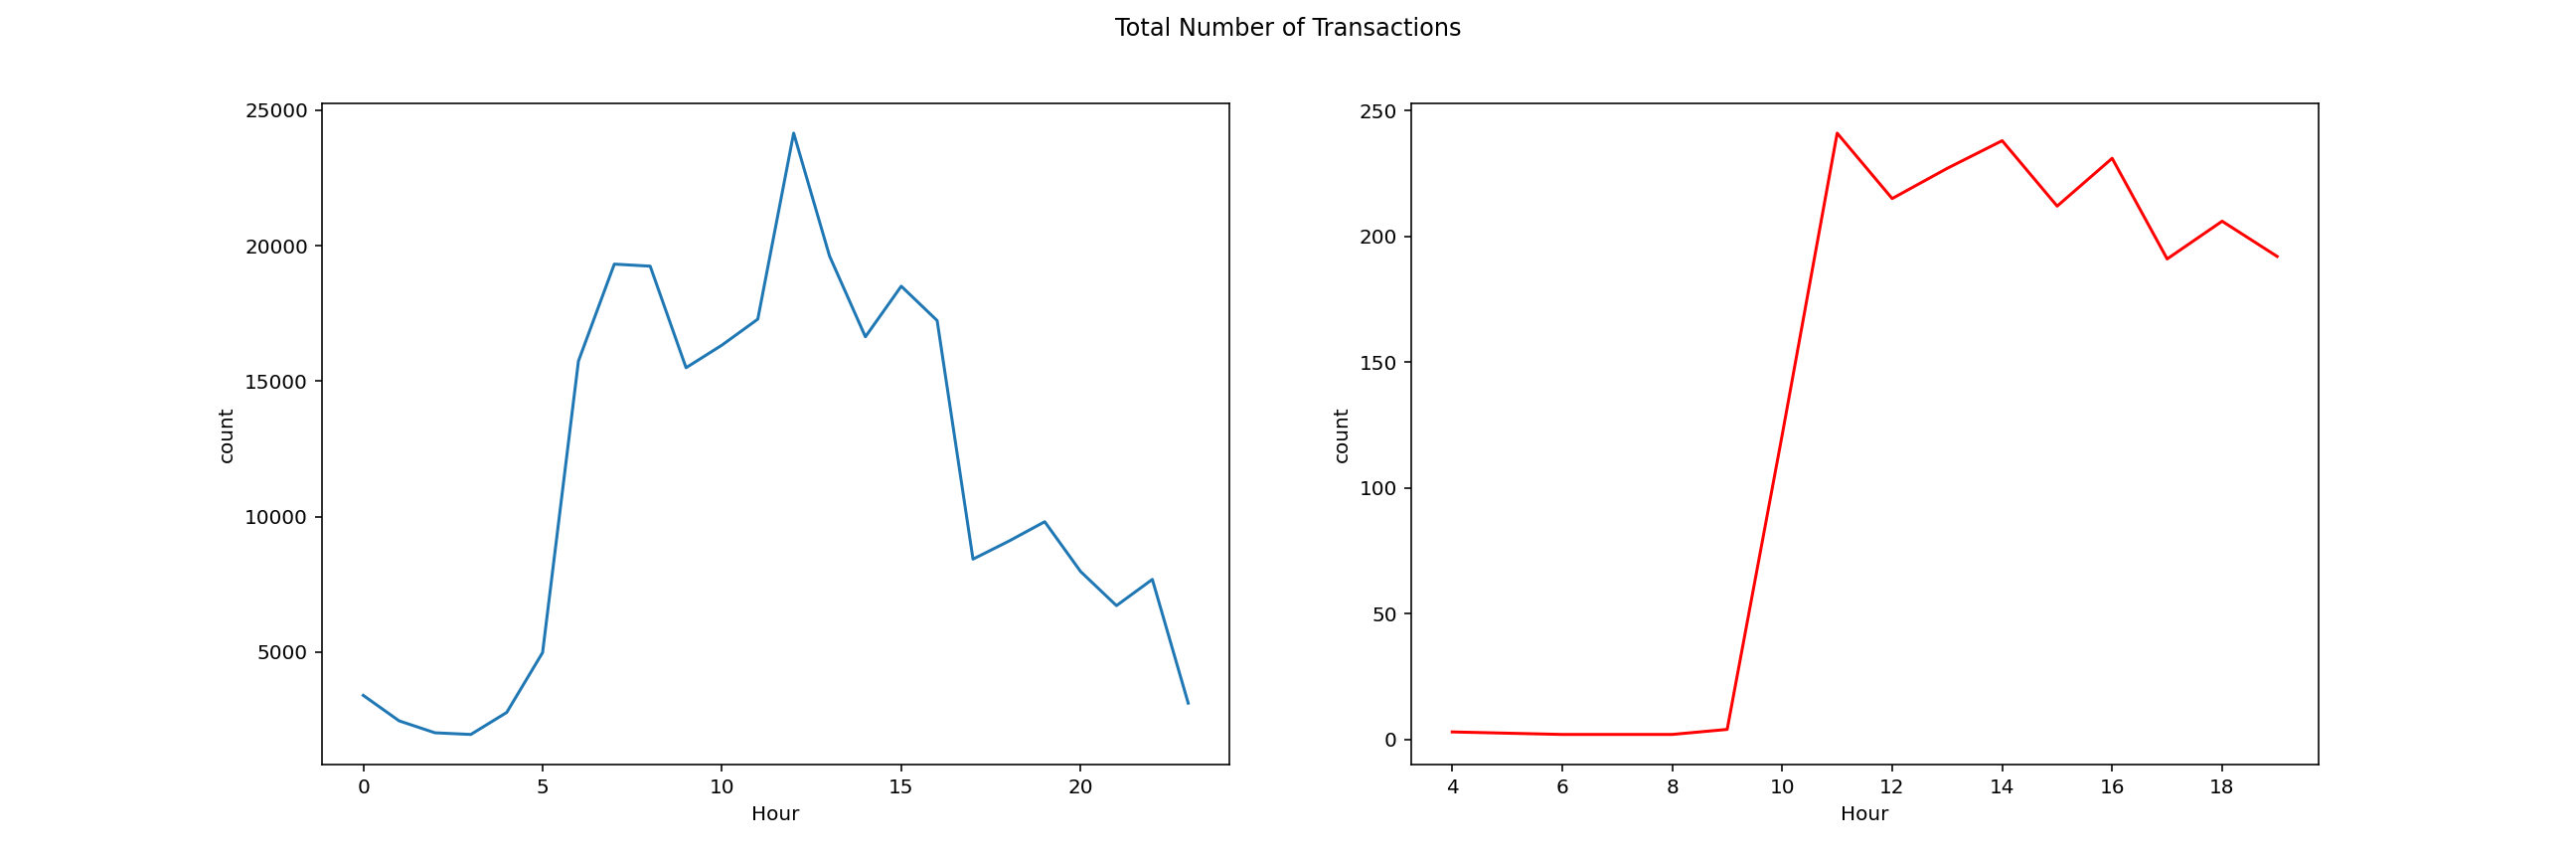
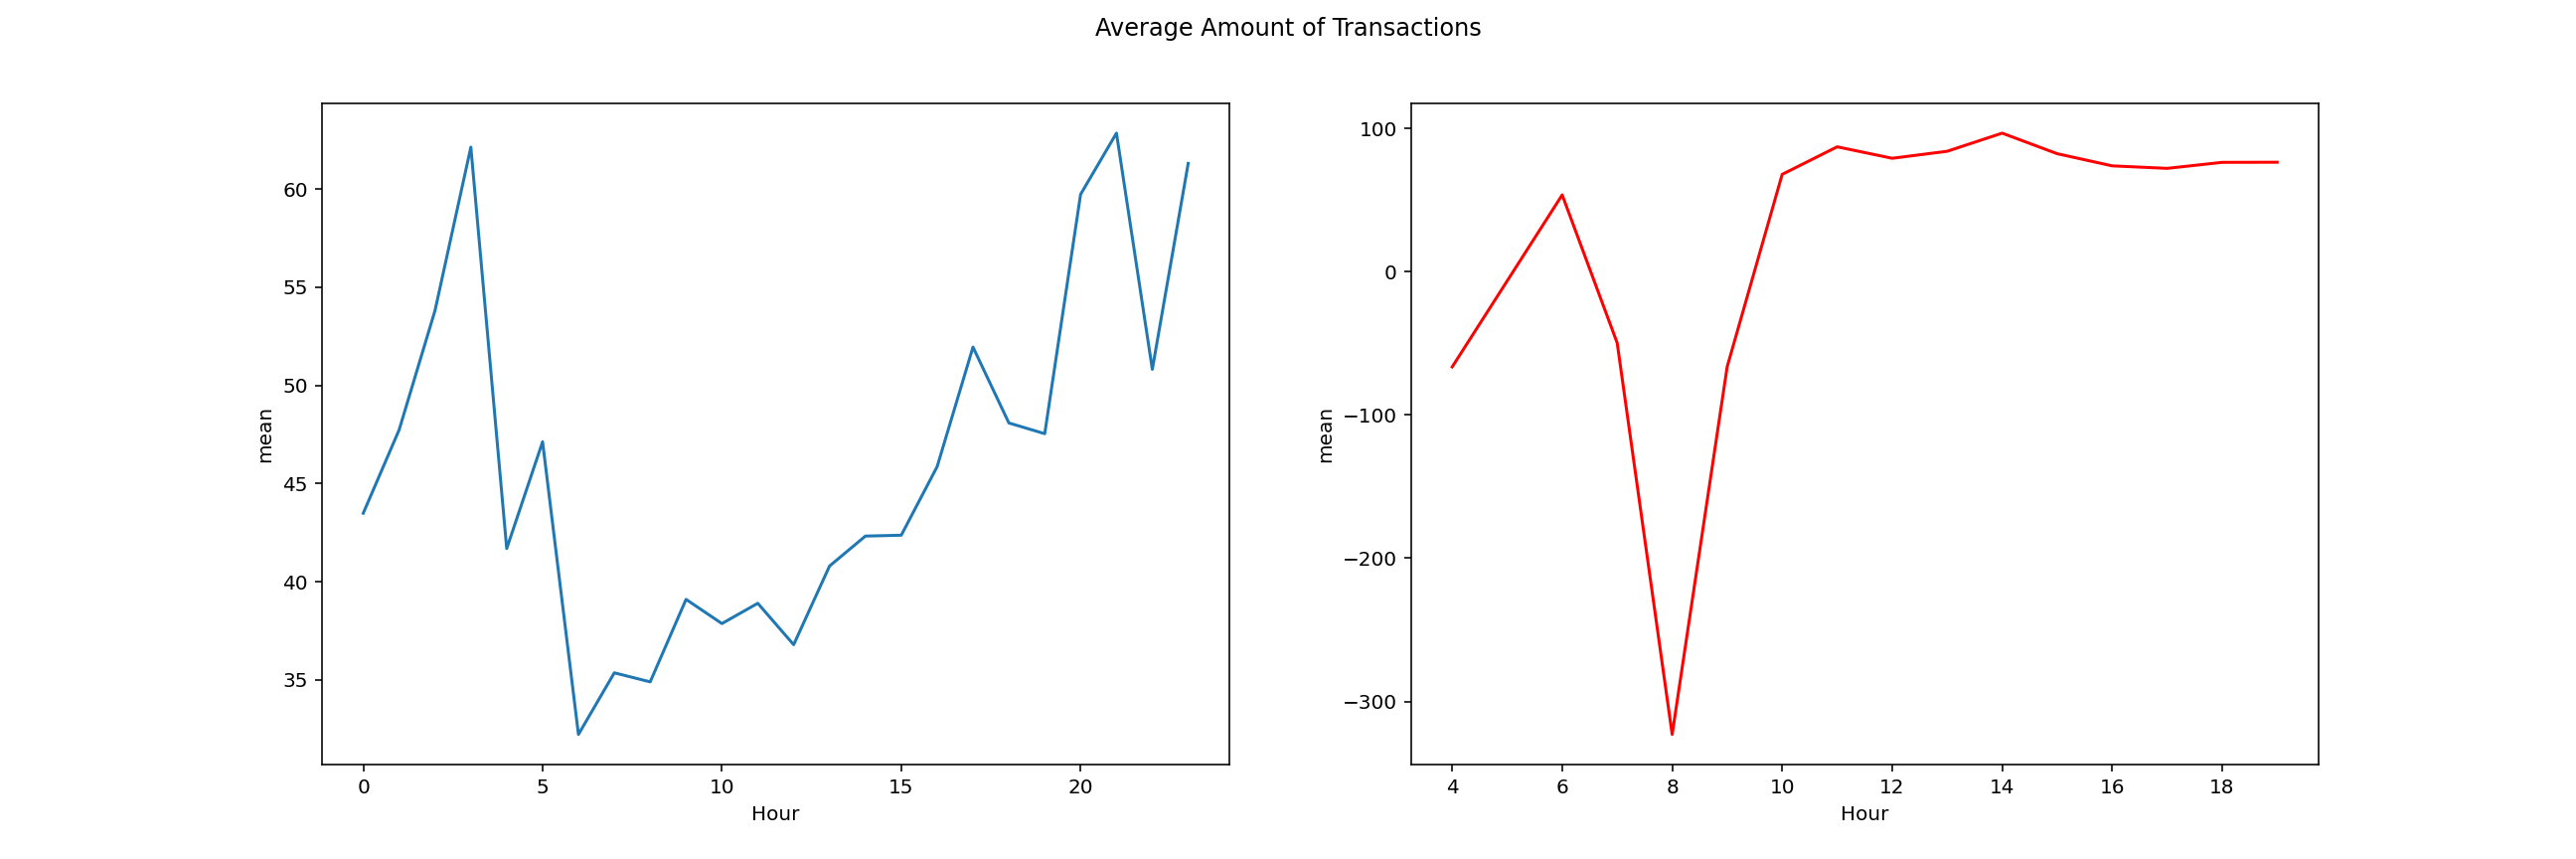
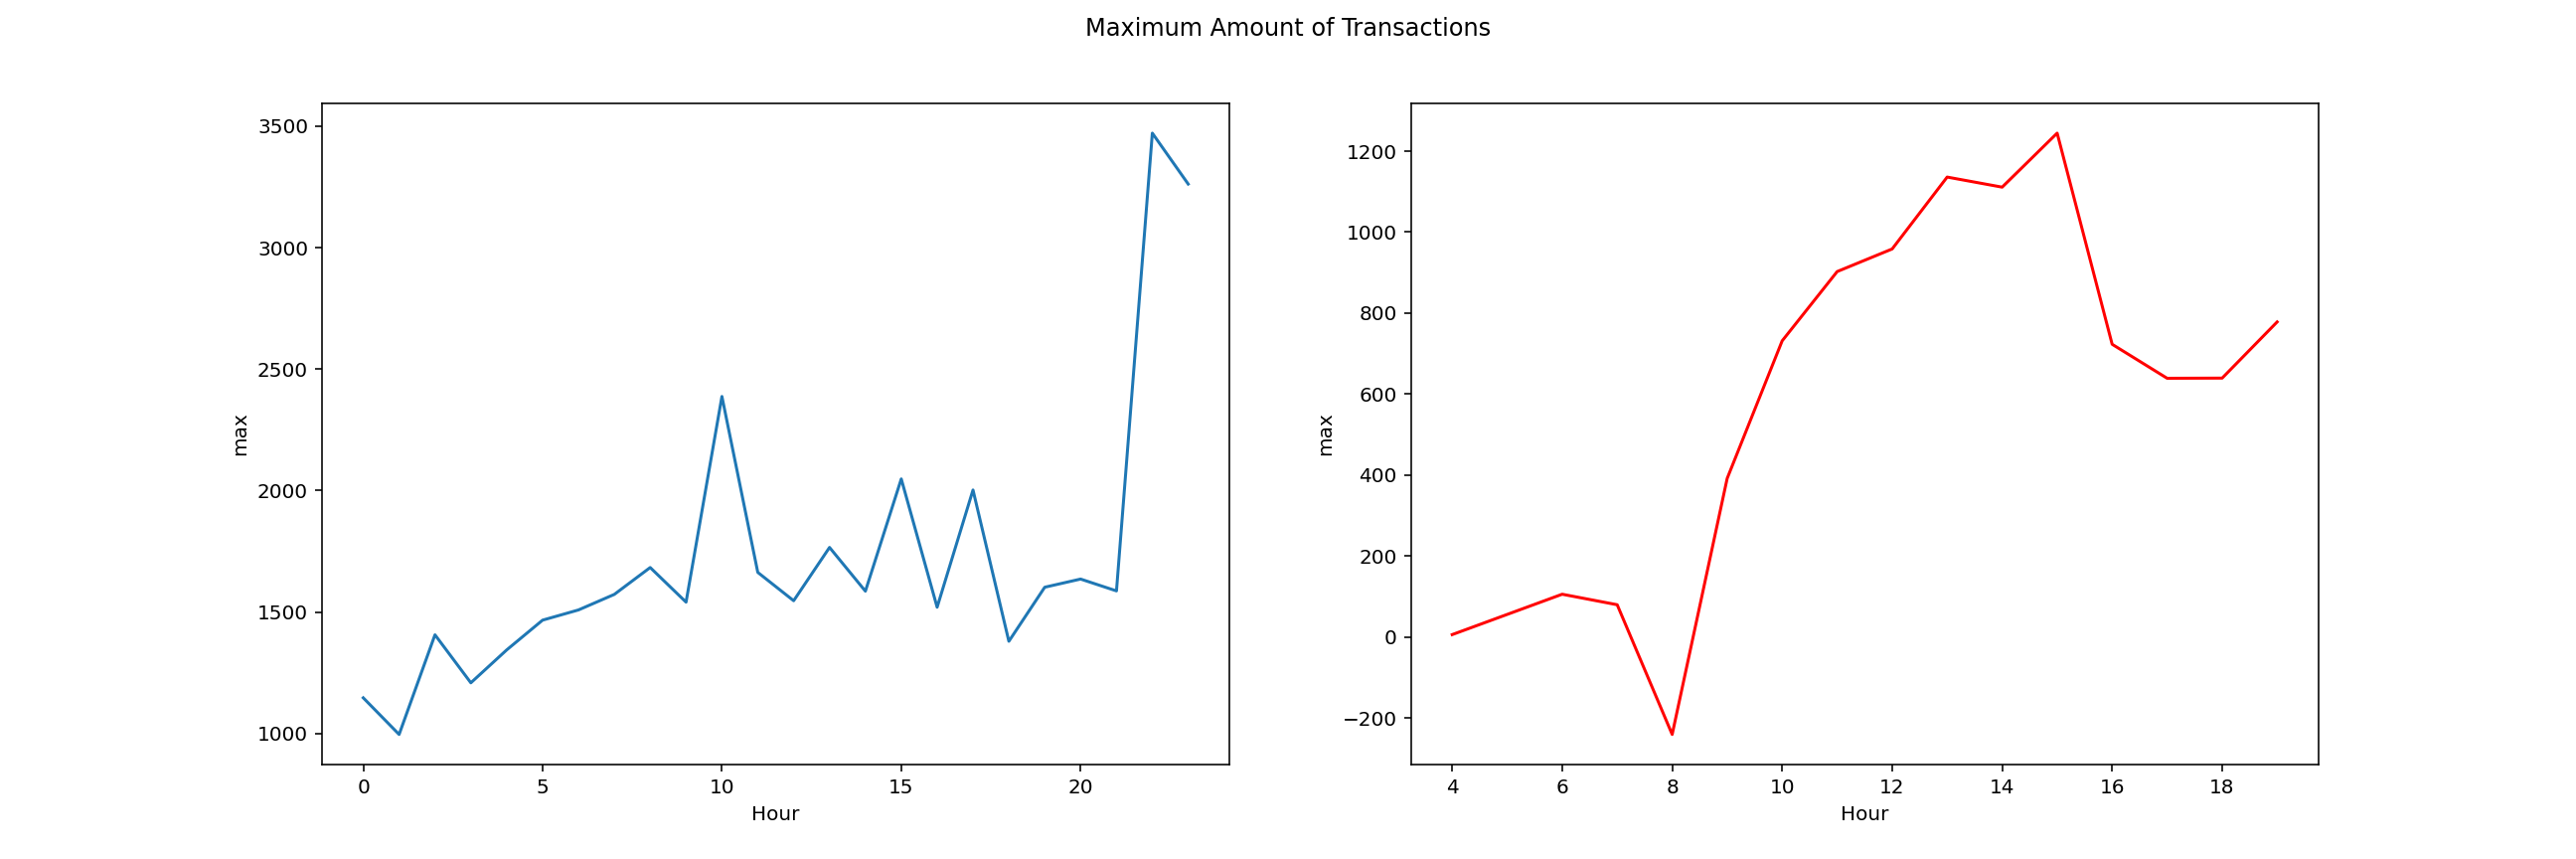
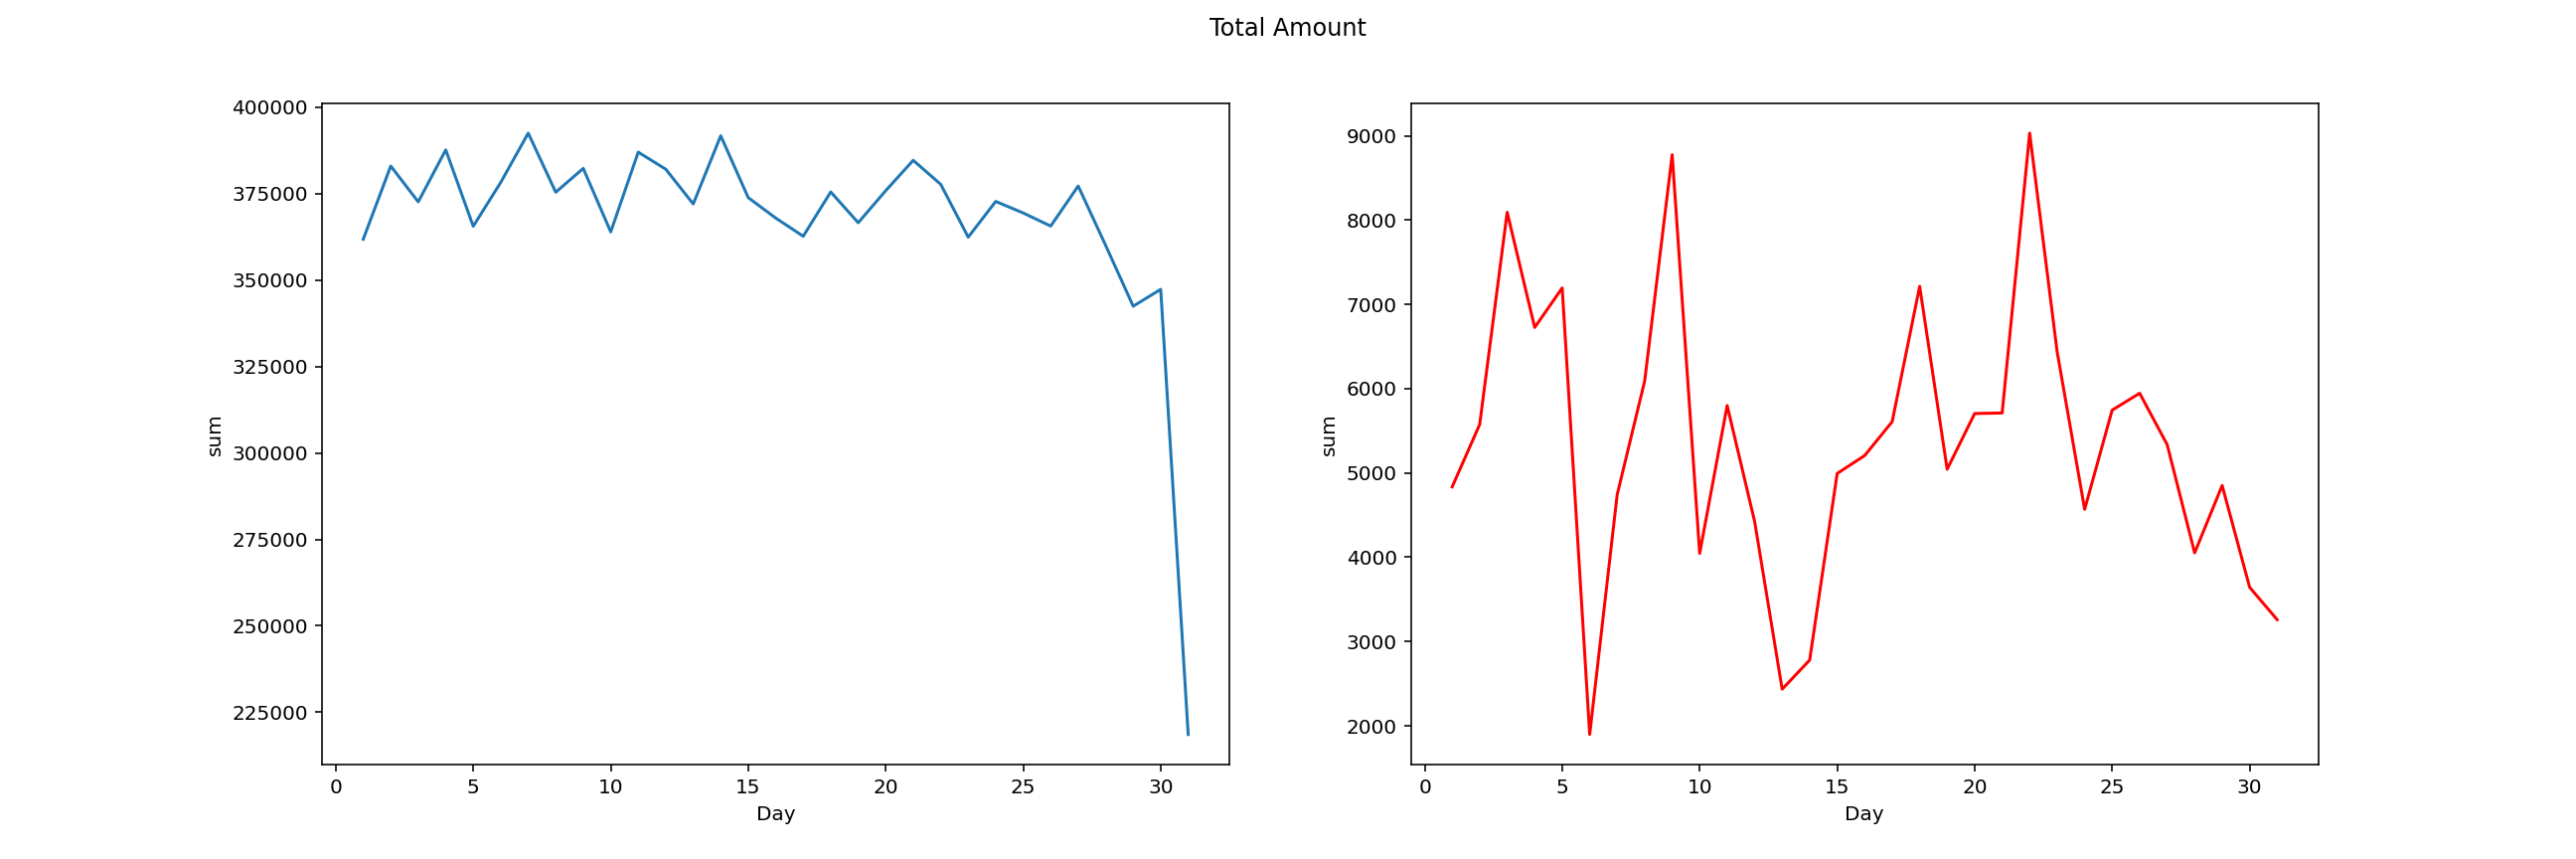

In [23]:
#Combining the different plots above into the tabs for the panel dashboards
tab1 = pn.Column(  
    '### Statistical Analysis of inputs (Daily)',
    fig_amount_daily,
    fig_number_daily,
    fig_mean_daily,
    fig_median_daily,
    fig_min_daily,
    fig_max_daily
)
tab2 = pn.Column(
    '### Statistical Analysis of inputs (Hourly)',
    fig_amount_hourly,
    fig_number_hourly,
    fig_mean_hourly,
    fig_median_hourly,
    fig_min_hourly,
    fig_max_hourly
)

tab3 = pn.Row(
    fig_box
)
#Putting this into panel tabs
tabs = pn.Tabs(
    #("Welcome", welcome_column),
    ("Daily", tab1),
    ("Hourly", tab2),
    ("Box plot", tab3)
)

#creating the panel dashboard
tabs.servable()